In [1]:
import numpy as np
import pickle
import os
import sys
import lzma
import itertools as it
import string

import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp

import tqdm
import contextlib
from SALib.sample import saltelli

import proplot as pplt

sys.path.append('../GDMaps_PCE/')
from DimensionReduction import Grassmann
from DimensionReduction import DiffusionMaps
from GDMaps_PCE_GSA_wLAR import *

from UQpy.distributions import Normal, Uniform, JointIndependent

# Plotting parameters
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["legend.fontsize"] = 12.5
mpl.rcParams["font.size"] = 13.5
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.alpha"] = 0.2
mpl.rcParams["axes.axisbelow"] = True
mpl.rcParams["figure.figsize"] = (6, 4)
mpl.rcParams["mathtext.fontset"] = "stix" # "cm"
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.titlesize'] = 15


USE_TEX = False

if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
    
plt.rc("font", family="serif")

mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [4]:
PATH_PT6 = "data/data_PT/"

# Micro level

In [5]:
num_runs = 10

micro_data = np.zeros((10, 8192, 250, 250), dtype=np.float16)

for i in tqdm.tqdm(range(num_runs)):
    data = pickle.load(lzma.open(PATH_PT6+f"arrays_for_GDMaps/micro_level/{i}_8192_1250_51_cpt.pkl.lzma"))
    # drop last time step
    data = data[:,:,:50].reshape(8192, 250, 250)
    micro_data[i] = data
    

100%|███████████████████████████████████████████| 10/10 [04:51<00:00, 29.18s/it]


In [6]:
ranks_micro = []
num_runs = 10

for run in tqdm.tqdm(range(num_runs)):
    data_all = micro_data[run].astype(np.float32)
    ranks_micro += [np.linalg.matrix_rank(data_all[i]) for i \
         in range(len(data_all))]

unique_micro, counts_micro = np.unique(ranks_micro, return_counts=True)
print(f'Ranks: \n {np.asarray((unique_micro, counts_micro)).T}')

100%|███████████████████████████████████████████| 10/10 [08:07<00:00, 48.75s/it]

Ranks: 
 [[  62    1]
 [  63    2]
 [  64    5]
 [  65    3]
 [  66   12]
 [  67    6]
 [  68   18]
 [  69   19]
 [  70   47]
 [  71   54]
 [  72   73]
 [  73   68]
 [  74  106]
 [  75  164]
 [  76  236]
 [  77  223]
 [  78  295]
 [  79  312]
 [  80  499]
 [  81  526]
 [  82  531]
 [  83  506]
 [  84  568]
 [  85  849]
 [  86  686]
 [  87  608]
 [  88  659]
 [  89  720]
 [  90 1030]
 [  91  688]
 [  92  592]
 [  93  664]
 [  94  825]
 [  95  915]
 [  96  601]
 [  97  594]
 [  98  644]
 [  99  844]
 [ 100 1050]
 [ 101  822]
 [ 102  738]
 [ 103  793]
 [ 104  889]
 [ 105 1067]
 [ 106  737]
 [ 107  740]
 [ 108  735]
 [ 109  798]
 [ 110  882]
 [ 111  778]
 [ 112  726]
 [ 113  801]
 [ 114  785]
 [ 115  745]
 [ 116  627]
 [ 117  658]
 [ 118  764]
 [ 119  720]
 [ 120  699]
 [ 121  641]
 [ 122  690]
 [ 123  615]
 [ 124  594]
 [ 125  627]
 [ 126  647]
 [ 127  618]
 [ 128  543]
 [ 129  576]
 [ 130  584]
 [ 131  556]
 [ 132  536]
 [ 133  540]
 [ 134  540]
 [ 135  560]
 [ 136  509]
 [ 137  465]
 [ 

In [7]:
micro_data_original_shape = micro_data.reshape(10, 8192, 1250, 50)

# Meso level

In [8]:
with open(PATH_PT6+"arrays_for_GDMaps/meso_arrays.pickle" , "rb") as f:
     meso_data = pickle.load(f)
        

In [9]:
ranks_meso = []
num_runs = 10

for run in tqdm.tqdm(range(num_runs)):
    data_all = meso_data[run].astype(np.float32)
    ranks_meso += [np.linalg.matrix_rank(data_all[i]) for i \
         in range(len(data_all))]

unique_meso, counts_meso = np.unique(ranks_meso, return_counts=True)
print(f'Ranks: \n {np.asarray((unique_meso, counts_meso)).T}')

100%|███████████████████████████████████████████| 10/10 [01:35<00:00,  9.60s/it]

Ranks: 
 [[   52     2]
 [   53     4]
 [   54    39]
 [   55    56]
 [   56    52]
 [   57    90]
 [   58    80]
 [   59    80]
 [   60   123]
 [   61   187]
 [   62   220]
 [   63   259]
 [   64   318]
 [   65   381]
 [   66   426]
 [   67   554]
 [   68   623]
 [   69   635]
 [   70   664]
 [   71   657]
 [   72   667]
 [   73   583]
 [   74   576]
 [   75   608]
 [   76   610]
 [   77   689]
 [   78   756]
 [   79   821]
 [   80   858]
 [   81   861]
 [   82   919]
 [   83  1020]
 [   84  1004]
 [   85   931]
 [   86   888]
 [   87  1029]
 [   88  1105]
 [   89  1153]
 [   90  1276]
 [   91  1309]
 [   92  1418]
 [   93  1402]
 [   94  1457]
 [   95  2005]
 [   96  1905]
 [   97  2439]
 [   98  2116]
 [   99  2591]
 [  100  3683]
 [  101  2397]
 [  102  1916]
 [  103  1898]
 [  104  1781]
 [  105  1883]
 [  106  2025]
 [  107  2320]
 [  108  3170]
 [  109  9905]
 [  110 12496]]


In [10]:
meso_data_original_shape = meso_data.reshape(10, 8192, 275, 44)

# Macro level

In [11]:
with open(PATH_PT6+"arrays_for_GDMaps/macro_arrays.pickle" , "rb") as f:
     macro_data = pickle.load(f)

In [12]:
ranks_macro = []
num_runs = 10

for run in tqdm.tqdm(range(num_runs)):
    data_all = macro_data[run].astype(np.float32)
    ranks_macro += [np.linalg.matrix_rank(data_all[i]) for i \
         in range(len(data_all))]

unique_macro, counts_macro = np.unique(ranks_macro, return_counts=True)
print(f'Ranks: \n {np.asarray((unique_macro, counts_macro)).T}')

100%|███████████████████████████████████████████| 10/10 [00:03<00:00,  3.17it/s]

Ranks: 
 [[    3  3147]
 [    4 25691]
 [    5 13703]
 [    6  8328]
 [    7 31051]]


In [13]:
macro_data_original_shape = macro_data.reshape(10, 8192, 1, 49)

In [14]:
macro_data_original_shape.shape

(10, 8192, 1, 49)

# Plots

In [15]:
if not os.path.exists('plots/main_text'):
    os.makedirs('plots/main_text')

if not os.path.exists('plots/appendix'):
    os.makedirs('plots/appendix')

## Trajectories

In [16]:
numbering  = ["(" + i + ")" for i in list(string.ascii_lowercase)]

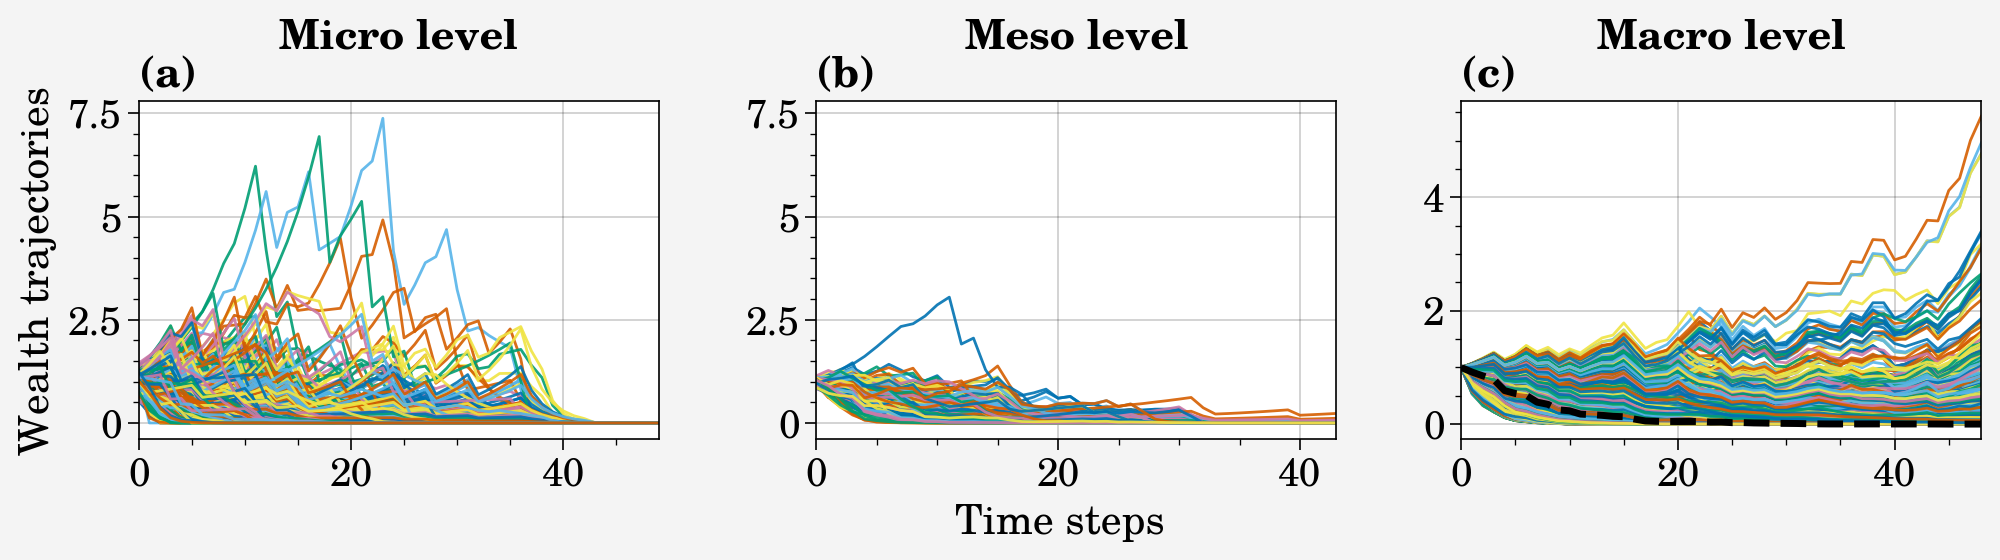

In [16]:
pplt.rc['tick.labelsize'] = 14

fig, axs = pplt.subplots(ncols=3, nrows=1, figsize=(10, 2.8), sharey=False, sharex=True)

for i in range(micro_data_original_shape.shape[2]):
    axs[0].plot(micro_data_original_shape[0][600][i][:], alpha=0.9, lw=1)
    axs[0].set_ylim(-0.4, 7.8)

for i in range(meso_data_original_shape.shape[2]):
    axs[1].plot(meso_data_original_shape[0][600][i][:], alpha=0.9, lw=1)
    axs[1].set_ylim(-0.4, 7.8)

# 256*8
for i in np.concatenate((np.arange(0, 600, 1), np.arange(601, 1024*8, 1)), axis=None):
    axs[2].plot(macro_data_original_shape[0][i][0], alpha=0.9, lw=1)
#     axs[2].set_ylim(-0.4, 7.8)

axs[2].plot(macro_data_original_shape[0][600][0], 
            color='black', 
            linestyle='--',
            alpha=1, lw=2.5)

axs.set_xlabel("Time steps")

axs[0].set_ylabel(r"Wealth trajectories", fontsize=18)
axs[1].set_ylabel(" ")
axs[2].set_ylabel(" ")
    
for i, ax in enumerate(axs):
    ax.format(title=numbering[i], titleloc='left', 
              titlepad=5, titleweight='bold')
axs.format(toplabels=["Micro level", "Meso level", "Macro level"])

axs.format(rc_kw={'label.size': 15,
                  'tick.labelsize': 14,
                  'title.size': 15,
                  'toplabel.pad': 0.1,
                  'toplabel.color': "k"})

plt.tight_layout()
plt.savefig('plots/main_text/PT6_all_traj.pdf',  dpi=300, bbox_inches='tight')
plt.show()

## Histograms

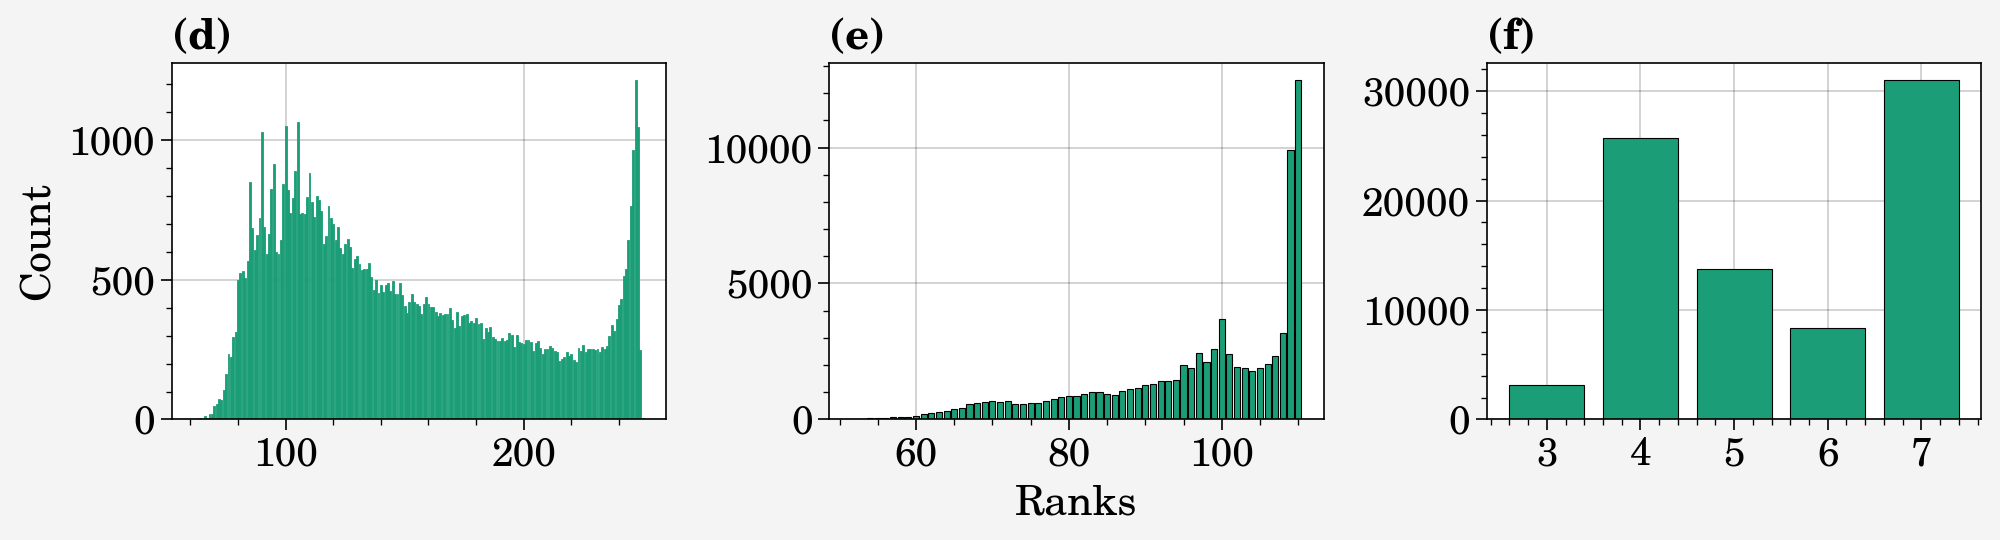

In [17]:
fig, axs = pplt.subplots(ncols=3, nrows=1, figsize=(10, 2.7), sharey=False, sharex=True)

# histograms
axs[0].bar(unique_micro, counts_micro, facecolor = '#1b9e77')

axs[1].bar(unique_meso, counts_meso, facecolor = '#1b9e77', edgecolor='k', linewidth=0.4)

axs[2].bar(unique_macro, counts_macro, facecolor = '#1b9e77', edgecolor='k', linewidth=0.4)
xticks_label_macro = ['{}'.format(num) for num in unique_macro]
axs[2].set_xticks(unique_macro, xticks_label_macro)

for ax in axs:
    ax.set_xlabel(r"Ranks")
    
axs[0].set_ylabel("Count")
# axs[1].set_ylabel(" ")
# axs[2].set_ylabel(" ")
    
for i, ax in enumerate(axs):
    ax.format(title=numbering[i+3], titleloc='left', 
              titlepad=5, titleweight='bold')
    
axs.format(rc_kw={'label.size': 15,
                  'title.size': 15,
                  'tick.labelsize': 14,
                  'title.size': 15})
    
plt.tight_layout()
plt.savefig('plots/main_text/PT6_hist.pdf', bbox_inches='tight')
plt.show()

## Scree-plots

In [18]:
# Micro files

micro_files_p_30 = sorted([f for f in os.listdir(PATH_PT6 + "GDMAPS_results/") 
                           if "micro" in f
                           and "p_30" in f
                           and "nonparsim" not in f])

d_coords_micro_p_30 = []
evals_micro_p_30 = []
evecs_micro_p_30 = []
coords_micro_p_30 = []

for f in micro_files_p_30:
    with open(PATH_PT6 + "GDMAPS_results/" + f, "rb") as f:
        evals_diff_runs, evecs_diff_runs, coord_diff_runs, g_diff_runs, _, _ = pickle.load(f)
    d_coords_micro_p_30.append(g_diff_runs[0])
    evals_micro_p_30.append(evals_diff_runs[0])
    evecs_micro_p_30.append(evecs_diff_runs[0])
    coords_micro_p_30.append(coord_diff_runs[0]) 
    
    
micro_files_p_70 = sorted([f for f in os.listdir(PATH_PT6 + "GDMAPS_results/") 
                           if "micro" in f
                           and "p_70" in f
                           and "nonparsim" not in f])

d_coords_micro_p_70 = []
evals_micro_p_70 = []
evecs_micro_p_70 = []
coords_micro_p_70 = []

for f in micro_files_p_70:
    with open(PATH_PT6 + "GDMAPS_results/" + f, "rb") as f:
        evals_diff_runs, evecs_diff_runs, coord_diff_runs, g_diff_runs, _, _ = pickle.load(f)
    d_coords_micro_p_70.append(g_diff_runs[0])
    evals_micro_p_70.append(evals_diff_runs[0])
    evecs_micro_p_70.append(evecs_diff_runs[0])
    coords_micro_p_70.append(coord_diff_runs[0])

In [19]:
# Meso files

GDMaps_results_meso_p_20 = np.load(PATH_PT6 + "GDMAPS_results/PT_meso_parsim_10_runs_p_20.npz", 
                                    allow_pickle=True)

d_coords_meso_p_20 = GDMaps_results_meso_p_20['x4']
evals_meso_p_20 = GDMaps_results_meso_p_20['x1']
evecs_meso_p_20 = GDMaps_results_meso_p_20['x2']
coords_meso_p_20 = GDMaps_results_meso_p_20['x3']


GDMaps_results_meso_p_70 = np.load(PATH_PT6 + "GDMAPS_results/PT_meso_parsim_10_runs_p_70.npz", 
                                    allow_pickle=True)

d_coords_meso_p_70 = GDMaps_results_meso_p_70['x4']
evals_meso_p_70 = GDMaps_results_meso_p_70['x1']
evecs_meso_p_70 = GDMaps_results_meso_p_70['x2']
coords_meso_p_70 = GDMaps_results_meso_p_70['x3']


In [20]:
# Macro files

macro_files_p_4 = sorted([f for f in os.listdir(PATH_PT6 + "GDMAPS_results/") 
                          if "macro" in f
                          and "p_4" in f
                          and "nonparsim" not in f])

d_coords_macro_p_4 = []
evals_macro_p_4 = []
evecs_macro_p_4 = []
coords_macro_p_4 = []

for f in macro_files_p_4:
    with open(PATH_PT6 + "GDMAPS_results/" + f, "rb") as f:
        evals_diff_runs, evecs_diff_runs, coord_diff_runs, g_diff_runs, _, _ = pickle.load(f)
    d_coords_macro_p_4.append(g_diff_runs[0])
    evals_macro_p_4.append(evals_diff_runs[0])
    evecs_macro_p_4.append(evecs_diff_runs[0])
    coords_macro_p_4.append(coord_diff_runs[0]) 

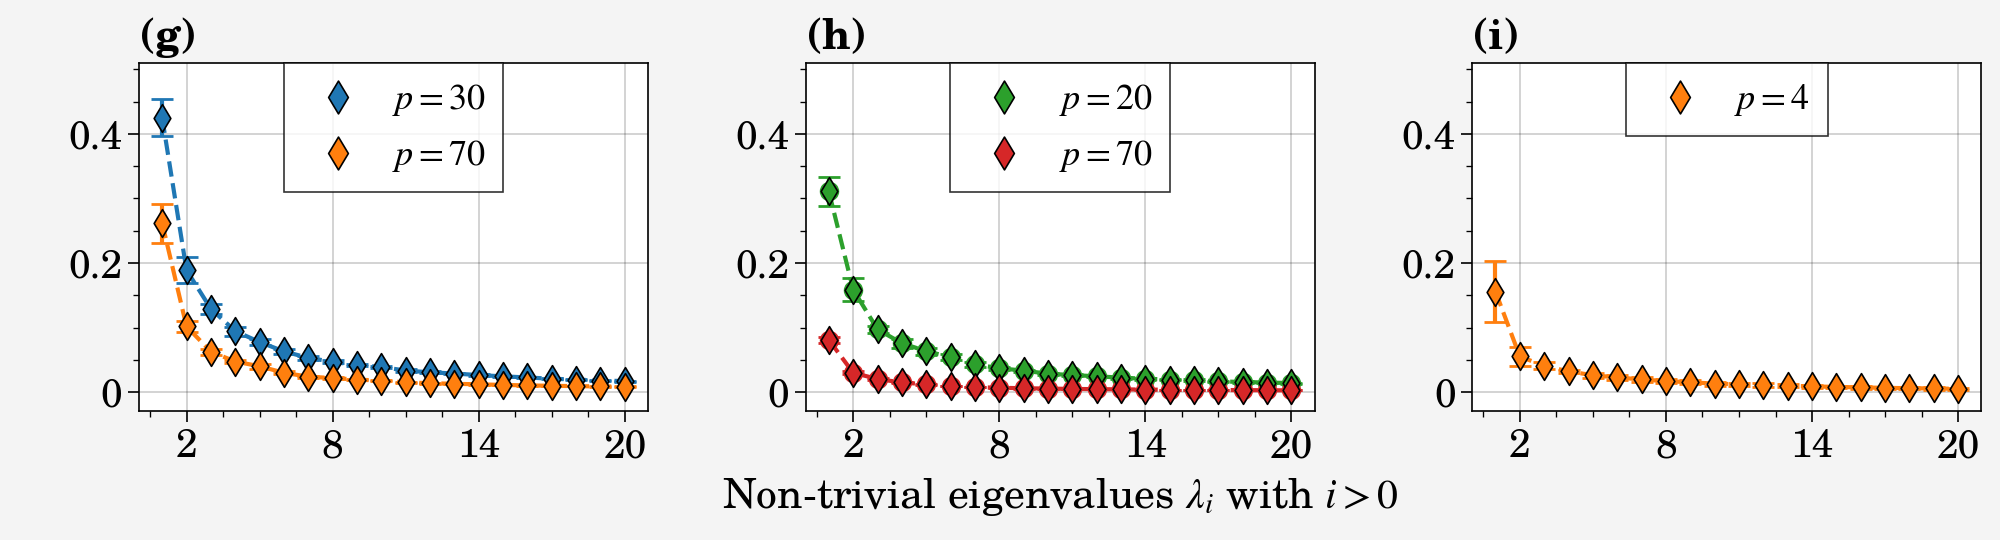

In [22]:
colors=mcp.gen_color(cmap="tab10",n=10)

fig, axs = pplt.subplots(ncols=3, nrows=1, figsize=(10, 2.7), sharey=False, sharex=True)

ticks_x = np.linspace(2, 20, 4, dtype='int')

micro_evals = [evals_micro_p_30, evals_micro_p_70]
meso_evals  = [evals_meso_p_20, evals_meso_p_70]

# screeplots
for i, p in enumerate([30, 70]):
    
    evals = micro_evals[i]

    x = np.arange(1, len(evals[0]), 1)
    axs[0].scatter(x, np.mean(evals, axis=0)[1:],
                   color=colors[i], label=r"$p={}$".format(p), 
                   edgecolor="k", marker="d", 
                   markersize=50, zorder=3)
    axs[0].errorbar(x, np.mean(evals, axis=0)[1:], 
                    np.std(evals, axis=0, ddof=1)[1:],
                    color=colors[i],
                    linestyle='--', capsize=4)
    axs[0].set_xticks(ticks_x,
                      ['{}'.format(num) for num in ticks_x])

for i, p in enumerate([20, 70]):
    
    evals = meso_evals[i]

    x = np.arange(1, len(evals[0]), 1)
    
    axs[1].scatter(x, np.mean(evals, axis=0)[1:],
                   color=colors[i+2], label=r"$p={}$".format(p), 
                   edgecolor='k', marker="d", 
                   markersize=50, zorder=3)
    axs[1].errorbar(x,
                    np.mean(evals, axis=0)[1:], 
                    np.std(evals, axis=0, ddof=1)[1:],
                    color=colors[i+2],
                    linestyle='--', marker='o', capsize=4)
    axs[1].set_xticks(ticks_x,
                      ['{}'.format(num) for num in ticks_x])
    
    
evals = evals_macro_p_4

x = np.arange(1, len(evals[0]), 1)
axs[2].scatter(x, np.mean(evals, axis=0)[1:],
               color=colors[i], label=r"$p=4$", 
               edgecolor="k", marker="d", 
               markersize=50, zorder=3)
axs[2].errorbar(x, np.mean(evals, axis=0)[1:], 
                np.std(evals, axis=0, ddof=1)[1:],
                color=colors[i],
                linestyle='--', capsize=4)
axs[2].set_xticks(ticks_x,
                  ['{}'.format(num) for num in ticks_x])

    
for i, ax in enumerate(axs):
    ax.set_ylim(-0.03, 0.51)
    lgnd = ax.legend(fontsize=13, loc='uc', ncols=1)
    ax.set_xlabel(r'Non-trivial eigenvalues $\lambda_i$ with $i > 0$')
    ax.format(title=numbering[i+6], titleloc='left',
              titlepad=5, titleweight='bold')
    
    if ax==axs[0] or ax==axs[1]:
        lgnd.legendHandles[0]._sizes = [70]
        lgnd.legendHandles[1]._sizes = [70]
    else:
        lgnd.legendHandles[0]._sizes = [70]
    
# axs.format(toplabels=["Micro level", "Meso level", "Macro level"])

for ax in axs:
    ax.set_ylabel(" ")

axs.format(rc_kw={'label.size': 15,
                  'title.size': 15,
                  'tick.labelsize': 14,
                  'title.size': 15})
    
plt.tight_layout()
plt.savefig('plots/main_text/PT6_screeplots.pdf', bbox_inches='tight')
plt.show()

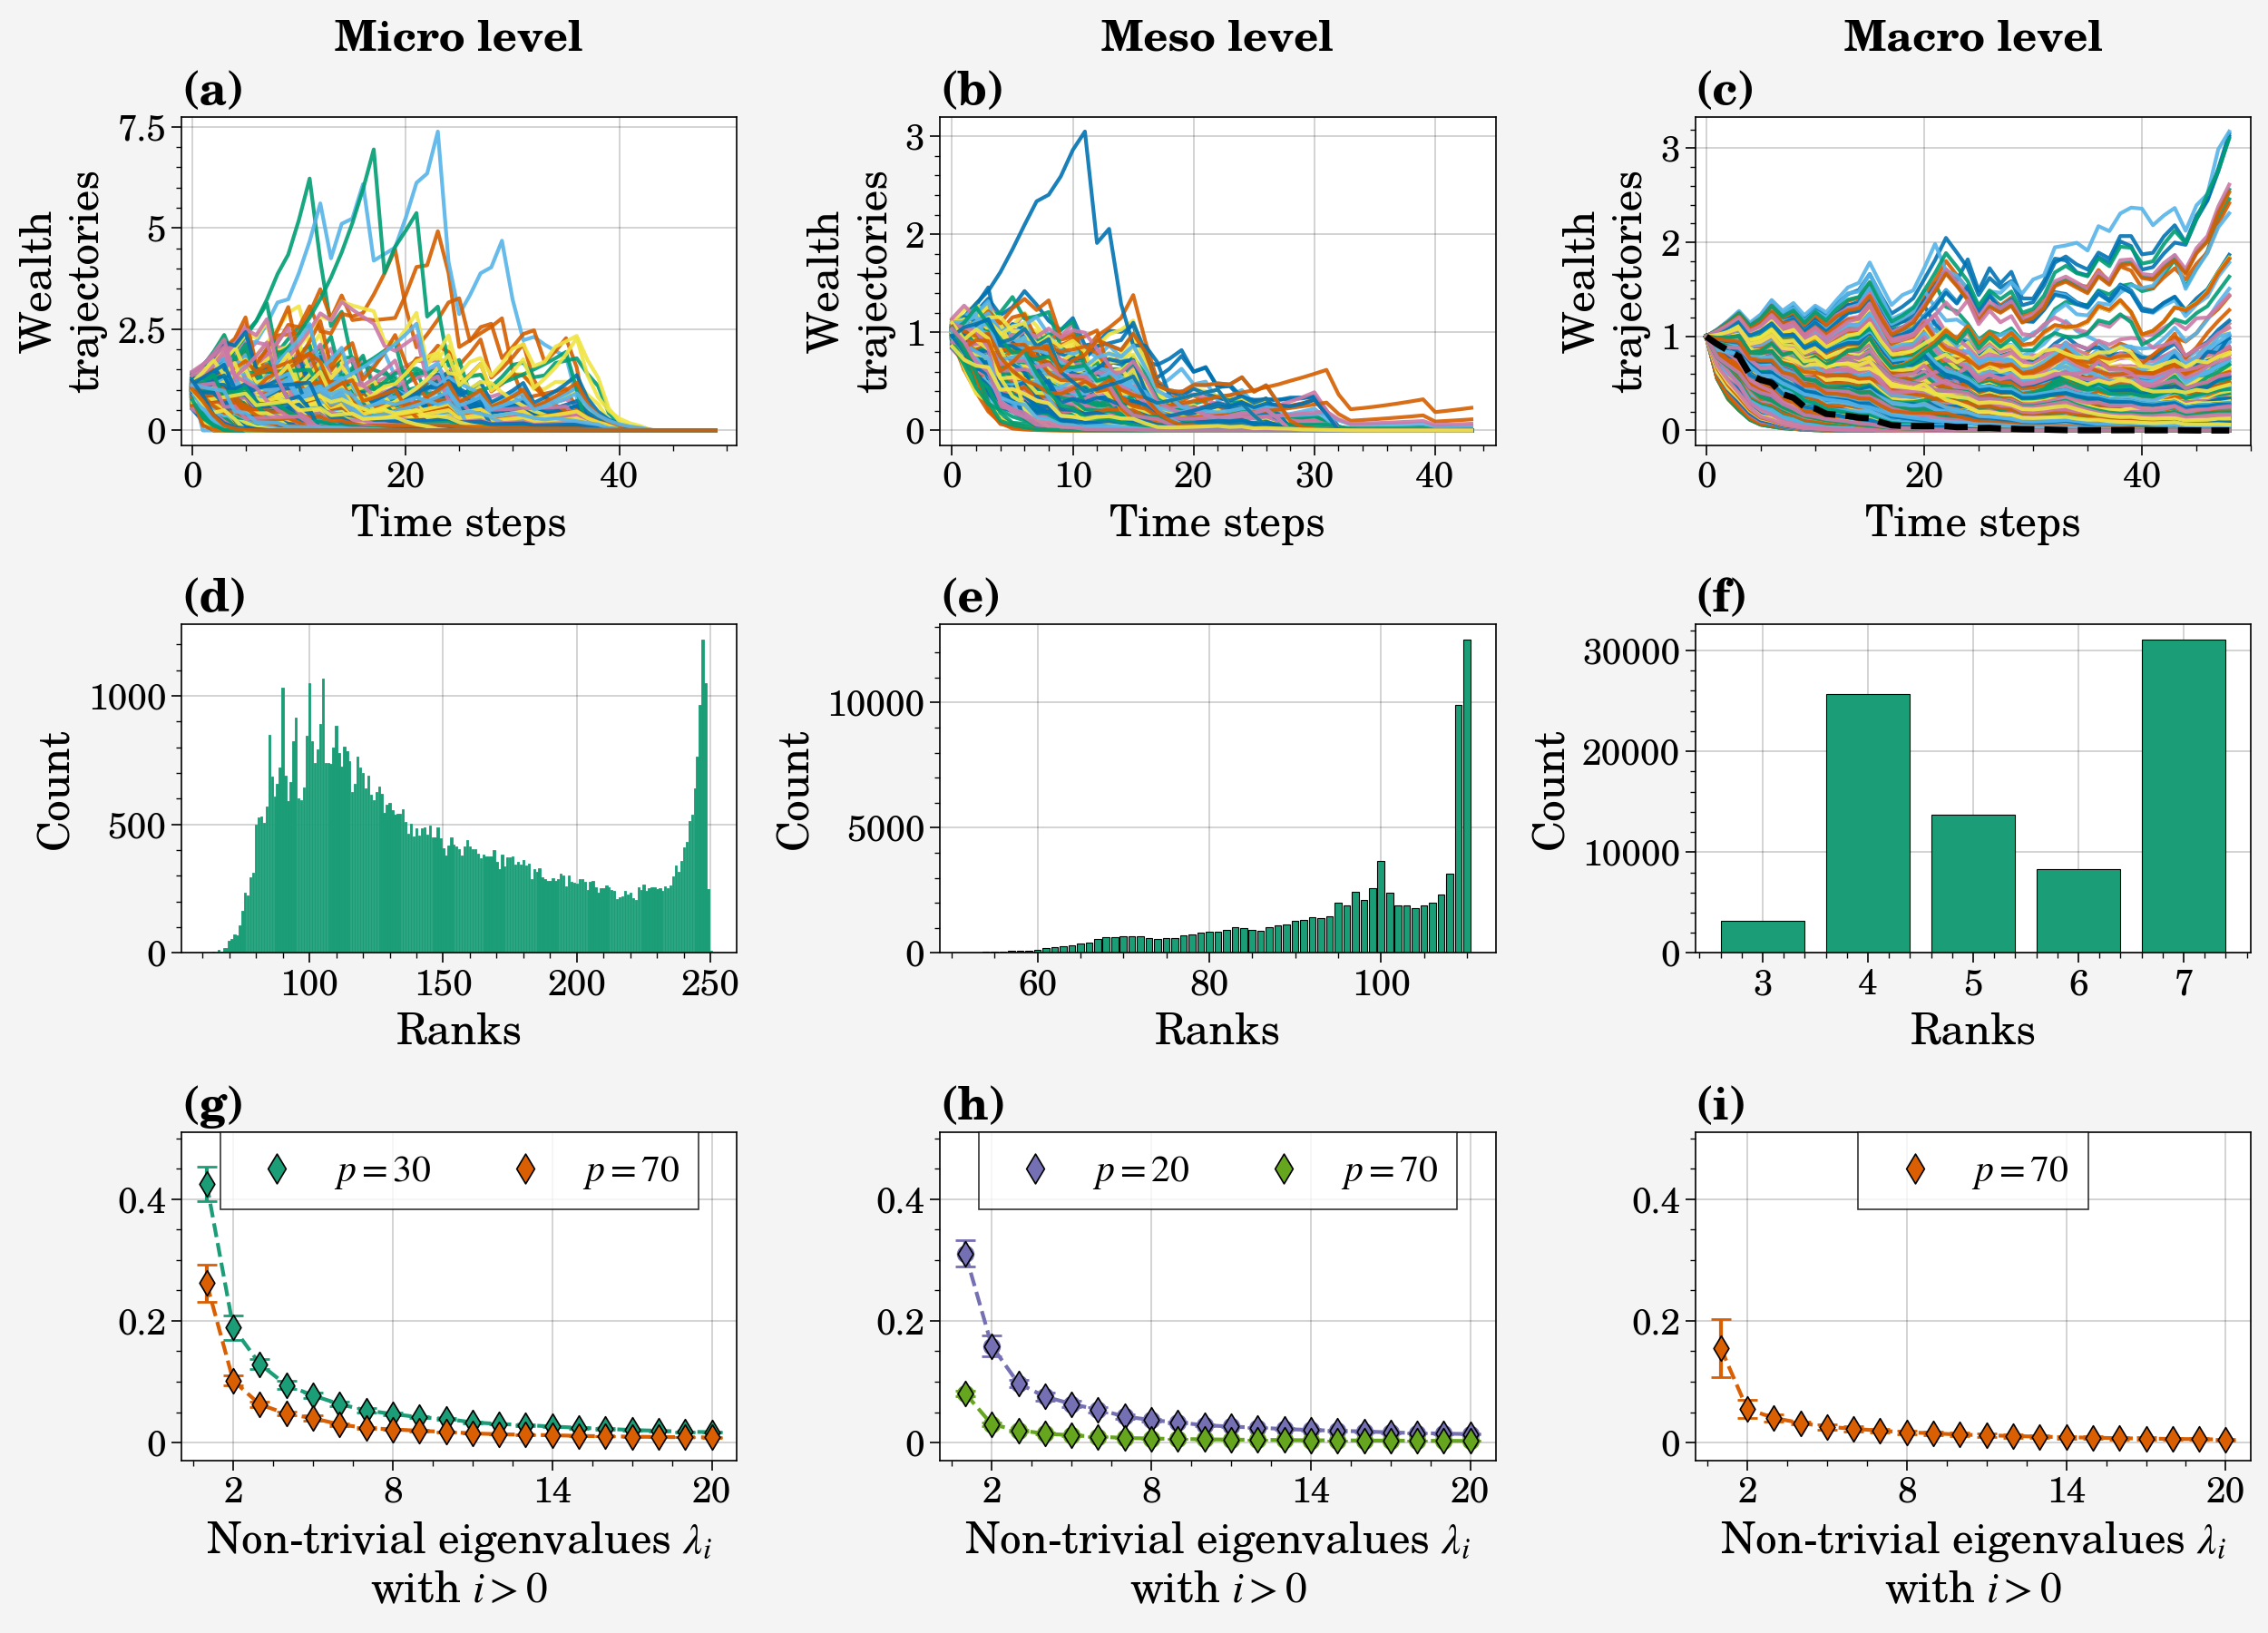

In [23]:
# Combining all plots together

pplt.rc['tick.labelsize'] = 13

fig, axs = pplt.subplots(ncols=3, nrows=3, figsize=(12.5, 9), sharey=False, sharex=False)

colors=mcp.gen_color(cmap="Dark2",n=7)

# trajectories
for i in range(micro_data_original_shape.shape[2]):
    axs[0].plot(micro_data_original_shape[0][600][i][:], alpha=0.9, lw=1.5)
    axs[0].set_xlim(-1, 51)

for i in range(meso_data_original_shape.shape[2]):
    axs[1].plot(meso_data_original_shape[0][600][i][:], alpha=0.9, lw=1.5)
    axs[1].set_xlim(-1, 45)

for i in range(512*8): 
    axs[2].plot(macro_data_original_shape[0][i][0], alpha=0.9, lw=1.5)
    axs[2].set_xlim(-1, 50)

for ax in [axs[0], axs[1], axs[2]]:
    ax.set_xlabel("Time steps")
    ax.set_ylabel("Wealth\ntrajectories")
    
axs[2].plot(macro_data_original_shape[0][600][0], 
            color='black', 
            linestyle='--',
            alpha=1, lw=2.5)
    
# histograms
axs[3].bar(unique_micro, counts_micro, facecolor = '#1b9e77')
axs[4].bar(unique_meso, counts_meso, facecolor = '#1b9e77', edgecolor='k', linewidth=0.4)
axs[5].bar(unique_macro, counts_macro, facecolor = '#1b9e77', edgecolor='k', linewidth=0.4)
xticks_label_macro = ['{}'.format(num) for num in unique_macro]
axs[5].set_xticks(unique_macro, xticks_label_macro)

for ax in [axs[3],axs[4],axs[5]]:
    ax.set(ylabel = r"Count", xlabel = r"Ranks")
    
    
# screeplots
for i, p in enumerate([30, 70]):
    
    evals = micro_evals[i]

    x = np.arange(1, len(evals[0]), 1)
    axs[6].scatter(x, np.mean(evals, axis=0)[1:],
                   color=colors[i], label=r"$p={}$".format(p), 
                   edgecolor="k", marker="d", 
                   markersize=50, zorder=3)
    axs[6].errorbar(x, np.mean(evals, axis=0)[1:], 
                    np.std(evals, axis=0, ddof=1)[1:],
                    color=colors[i],
                    linestyle='--', capsize=4)
    axs[6].set_xticks(ticks_x,
                      ['{}'.format(num) for num in ticks_x])

for i, p in enumerate([20, 70]):
    
    evals = meso_evals[i]

    x = np.arange(1, len(evals[0]), 1)
    
    axs[7].scatter(x, np.mean(evals, axis=0)[1:],
                   color=colors[i+2], label=r"$p={}$".format(p), 
                   edgecolor='k', marker="d", 
                   markersize=50, zorder=3)
    axs[7].errorbar(x,
                    np.mean(evals, axis=0)[1:], 
                    np.std(evals, axis=0, ddof=1)[1:],
                    color=colors[i+2],
                    linestyle='--', marker='o', capsize=4)
    axs[7].set_xticks(ticks_x,
                      ['{}'.format(num) for num in ticks_x])
    
    
evals = evals_macro_p_4

x = np.arange(1, len(evals[0]), 1)
axs[8].scatter(x, np.mean(evals, axis=0)[1:],
               color=colors[i], label=r"$p={}$".format(p), 
               edgecolor="k", marker="d", 
               markersize=50, zorder=3)
axs[8].errorbar(x, np.mean(evals, axis=0)[1:], 
                np.std(evals, axis=0, ddof=1)[1:],
                color=colors[i],
                linestyle='--', capsize=4)
axs[8].set_xticks(ticks_x,
                  ['{}'.format(num) for num in ticks_x])

    
for i, ax in enumerate([axs[6],axs[7],axs[8]]):
    ax.set_ylim(-0.03, 0.51)
    lgnd = ax.legend(fontsize=15, loc='uc')
    ax.set_xlabel(r'Non-trivial eigenvalues $\lambda_i$'+'\n'+r'with $i > 0$')
    if ax==axs[6] or ax==axs[7]:
        lgnd.legendHandles[0]._sizes = [70]
        lgnd.legendHandles[1]._sizes = [70]
    else:
        lgnd.legendHandles[0]._sizes = [70]

axs.format(abc='(a)')
axs.format(toplabels=["Micro level", "Meso level", "Macro level"])

axs.format(rc_kw={'label.size': 17,
                  'abc.size': 18,
                  'toplabel.size' : 17,
                  'title.size': 15,
                  'tick.labelsize': 14,
                  'title.size': 15})

plt.tight_layout()
plt.savefig('plots/main_text/PT6_all_preliminaries.pdf', bbox_inches='tight')
plt.show()


# GDMaps: from parsim to nonparsim

In [3]:
PATH = "data/data_PT/data_6_param/GDMAPS_results/"

In [4]:
n_samples = 1024*8
n_runs = 10

In [5]:
micro_p = 30

micro_files_p_30 = sorted([f for f in os.listdir(PATH) 
                           if "micro" in f 
                           and f"p_{micro_p}" in f
                           and "nonparsim" not in f])

d_coords_micro_p_30 = []
evals_micro_p_30 = []
evecs_micro_p_30 = []
coords_micro_p_30 = []

for f in micro_files_p_30:
    with open(PATH + f, "rb") as f:
        evals_diff_runs, evecs_diff_runs, coord_diff_runs, g_diff_runs, _, _ = pickle.load(f)
    d_coords_micro_p_30.append(g_diff_runs[0])
    evals_micro_p_30.append(evals_diff_runs[0])
    evecs_micro_p_30.append(evecs_diff_runs[0])
    coords_micro_p_30.append(coord_diff_runs[0])  
    
    
d_coords_nonparsim_micro_p_30 = []
for run in range(n_runs):
    d_coords_nonparsim_micro_p_30.append(nonparsim_dcoord(n_samples, 
                                                          3, 
                                                          evecs_micro_p_30[run], 
                                                          evals_micro_p_30[run]))
    
    
if not os.path.exists(PATH+f'nonparsim_micro_p_{micro_p}.npz'):
    np.savez(PATH+f'nonparsim_micro_p_{micro_p}.npz', 
             x1 = evals,  # evals
             x2 = evecs,  # evecs
             x3 = np.array([1,2,3]),  # coord
             x4 = d_coords_nonparsim_micro_p_30,  # g
            )
else:
    result_nonparsim = np.load(PATH+f'nonparsim_micro_p_{micro_p}.npz', 
                               allow_pickle=True)
    
    d_coords_nonparsim_micro_p_30 = result_nonparsim["x4"]
    coords_nonparsim_micro_p_30   = result_nonparsim["x3"]

In [6]:
micro_p = 70

micro_files_p_70 = sorted([f for f in os.listdir(PATH) 
                           if "micro" in f 
                           and f"p_{micro_p}" in f
                           and "nonparsim" not in f])

d_coords_micro_p_70 = []
evals_micro_p_70 = []
evecs_micro_p_70 = []
coords_micro_p_70 = []

for f in micro_files_p_70:
    with open(PATH + f, "rb") as f:
        evals_diff_runs, evecs_diff_runs, coord_diff_runs, g_diff_runs, _, _ = pickle.load(f)
    d_coords_micro_p_70.append(g_diff_runs[0])
    evals_micro_p_70.append(evals_diff_runs[0])
    evecs_micro_p_70.append(evecs_diff_runs[0])
    coords_micro_p_70.append(coord_diff_runs[0])  
    
    
d_coords_nonparsim_micro_p_70 = []
for run in range(n_runs):
    d_coords_nonparsim_micro_p_70.append(nonparsim_dcoord(n_samples, 
                                                          3, 
                                                          evecs_micro_p_70[run], 
                                                          evals_micro_p_70[run]))
    
    
if not os.path.exists(PATH+f'nonparsim_micro_p_{micro_p}.npz'):
    np.savez(PATH+f'nonparsim_micro_p_{micro_p}.npz', 
             x1 = evals,  # evals
             x2 = evecs,  # evecs
             x3 = np.array([1,2,3]),  # coord
             x4 = d_coords_nonparsim_micro_p_70,  # g
            )
else:
    result_nonparsim = np.load(PATH+f'nonparsim_micro_p_{micro_p}.npz', 
                               allow_pickle=True)
    
    d_coords_nonparsim_micro_p_70 = result_nonparsim["x4"]
    coords_nonparsim_micro_p_70   = result_nonparsim["x3"]

In [7]:
meso_p = 20

GDMaps_results_meso_p_20 = np.load(PATH + f"PT_meso_parsim_10_runs_p_{meso_p}.npz", 
                                    allow_pickle=True)

d_coords_meso_p_20 = GDMaps_results_meso_p_20['x4']
evals_meso_p_20 = GDMaps_results_meso_p_20['x1']
evecs_meso_p_20 = GDMaps_results_meso_p_20['x2']
coords_meso_p_20 = GDMaps_results_meso_p_20['x3']

d_coords_nonparsim_meso_p_20 = []
for run in range(n_runs):
    d_coords_nonparsim_meso_p_20.append(nonparsim_dcoord(n_samples, 
                                                         3, 
                                                         evecs_meso_p_20[run], 
                                                         evals_meso_p_20[run]))
    
    
if not os.path.exists(PATH+f'nonparsim_meso_p_{meso_p}.npz'):
    np.savez(PATH+f'nonparsim_meso_p_{meso_p}.npz', 
             x1 = evals,  # evals
             x2 = evecs,  # evecs
             x3 = np.array([1,2,3]),  # coord
             x4 = d_coords_nonparsim_meso_p_20,  # g
            )
else:
    result_nonparsim = np.load(PATH+f'nonparsim_meso_p_{meso_p}.npz', 
                               allow_pickle=True)
    
    d_coords_nonparsim_meso_p_20 = result_nonparsim["x4"]
    coords_nonparsim_meso_p_20   = result_nonparsim["x3"]

In [8]:
meso_p = 70

GDMaps_results_meso_p_70 = np.load(PATH + f"PT_meso_parsim_10_runs_p_{meso_p}.npz", 
                                    allow_pickle=True)

d_coords_meso_p_70 = GDMaps_results_meso_p_70['x4']
evals_meso_p_70 = GDMaps_results_meso_p_70['x1']
evecs_meso_p_70 = GDMaps_results_meso_p_70['x2']
coords_meso_p_70 = GDMaps_results_meso_p_70['x3']
                                   
                                   
d_coords_nonparsim_meso_p_70 = []
for run in range(n_runs):
    d_coords_nonparsim_meso_p_70.append(nonparsim_dcoord(n_samples, 
                                                         3, 
                                                         evecs_meso_p_70[run], 
                                                         evals_meso_p_70[run]))
    
    
if not os.path.exists(PATH+f'nonparsim_meso_p_{meso_p}.npz'):
    np.savez(PATH+f'nonparsim_meso_p_{meso_p}.npz', 
             x1 = evals,  # evals
             x2 = evecs,  # evecs
             x3 = np.array([1,2,3]),  # coord
             x4 = d_coords_nonparsim_meso_p_70,  # g
            )
else:
    result_nonparsim = np.load(PATH+f'nonparsim_meso_p_{meso_p}.npz', 
                               allow_pickle=True)
    
    d_coords_nonparsim_meso_p_70 = result_nonparsim["x4"]
    coords_nonparsim_meso_p_70   = result_nonparsim["x3"]



In [9]:
macro_p = 4

macro_files_p_4 = sorted([f for f in os.listdir(PATH) 
                           if "macro" in f 
                           and f"p_{macro_p}" in f
                           and "nonparsim" not in f])

d_coords_macro_p_4 = []
evals_macro_p_4 = []
evecs_macro_p_4 = []
coords_macro_p_4 = []

for f in macro_files_p_4:
    with open(PATH + f, "rb") as f:
        evals_diff_runs, evecs_diff_runs, coord_diff_runs, g_diff_runs, _, _ = pickle.load(f)
    d_coords_macro_p_4.append(g_diff_runs[0])
    evals_macro_p_4.append(evals_diff_runs[0])
    evecs_macro_p_4.append(evecs_diff_runs[0])
    coords_macro_p_4.append(coord_diff_runs[0])  
    
    
d_coords_nonparsim_macro_p_4 = []
for run in range(n_runs):
    d_coords_nonparsim_macro_p_4.append(nonparsim_dcoord(n_samples, 
                                                         3, 
                                                         evecs_macro_p_4[run], 
                                                         evals_macro_p_4[run]))
    
    
if not os.path.exists(PATH+f'nonparsim_macro_p_{macro_p}.npz'):
    np.savez(PATH+f'nonparsim_macro_p_{macro_p}.npz', 
             x1 = evals,  # evals
             x2 = evecs,  # evecs
             x3 = np.array([1,2,3]),  # coord
             x4 = d_coords_nonparsim_macro_p_4,  # g
            )
else:
    result_nonparsim = np.load(PATH+f'nonparsim_macro_p_{macro_p}.npz', 
                               allow_pickle=True)
    
    d_coords_nonparsim_macro_p_4 = result_nonparsim["x4"]
    coords_nonparsim_macro_p_4   = result_nonparsim["x3"]

## Scatterplots: diffusion coordinates

In [10]:
coord_data = [coords_micro_p_70,
              coords_meso_p_20,
              coords_macro_p_4]
g_data_all_runs = [d_coords_micro_p_70,
                   d_coords_meso_p_20,
                   d_coords_macro_p_4]

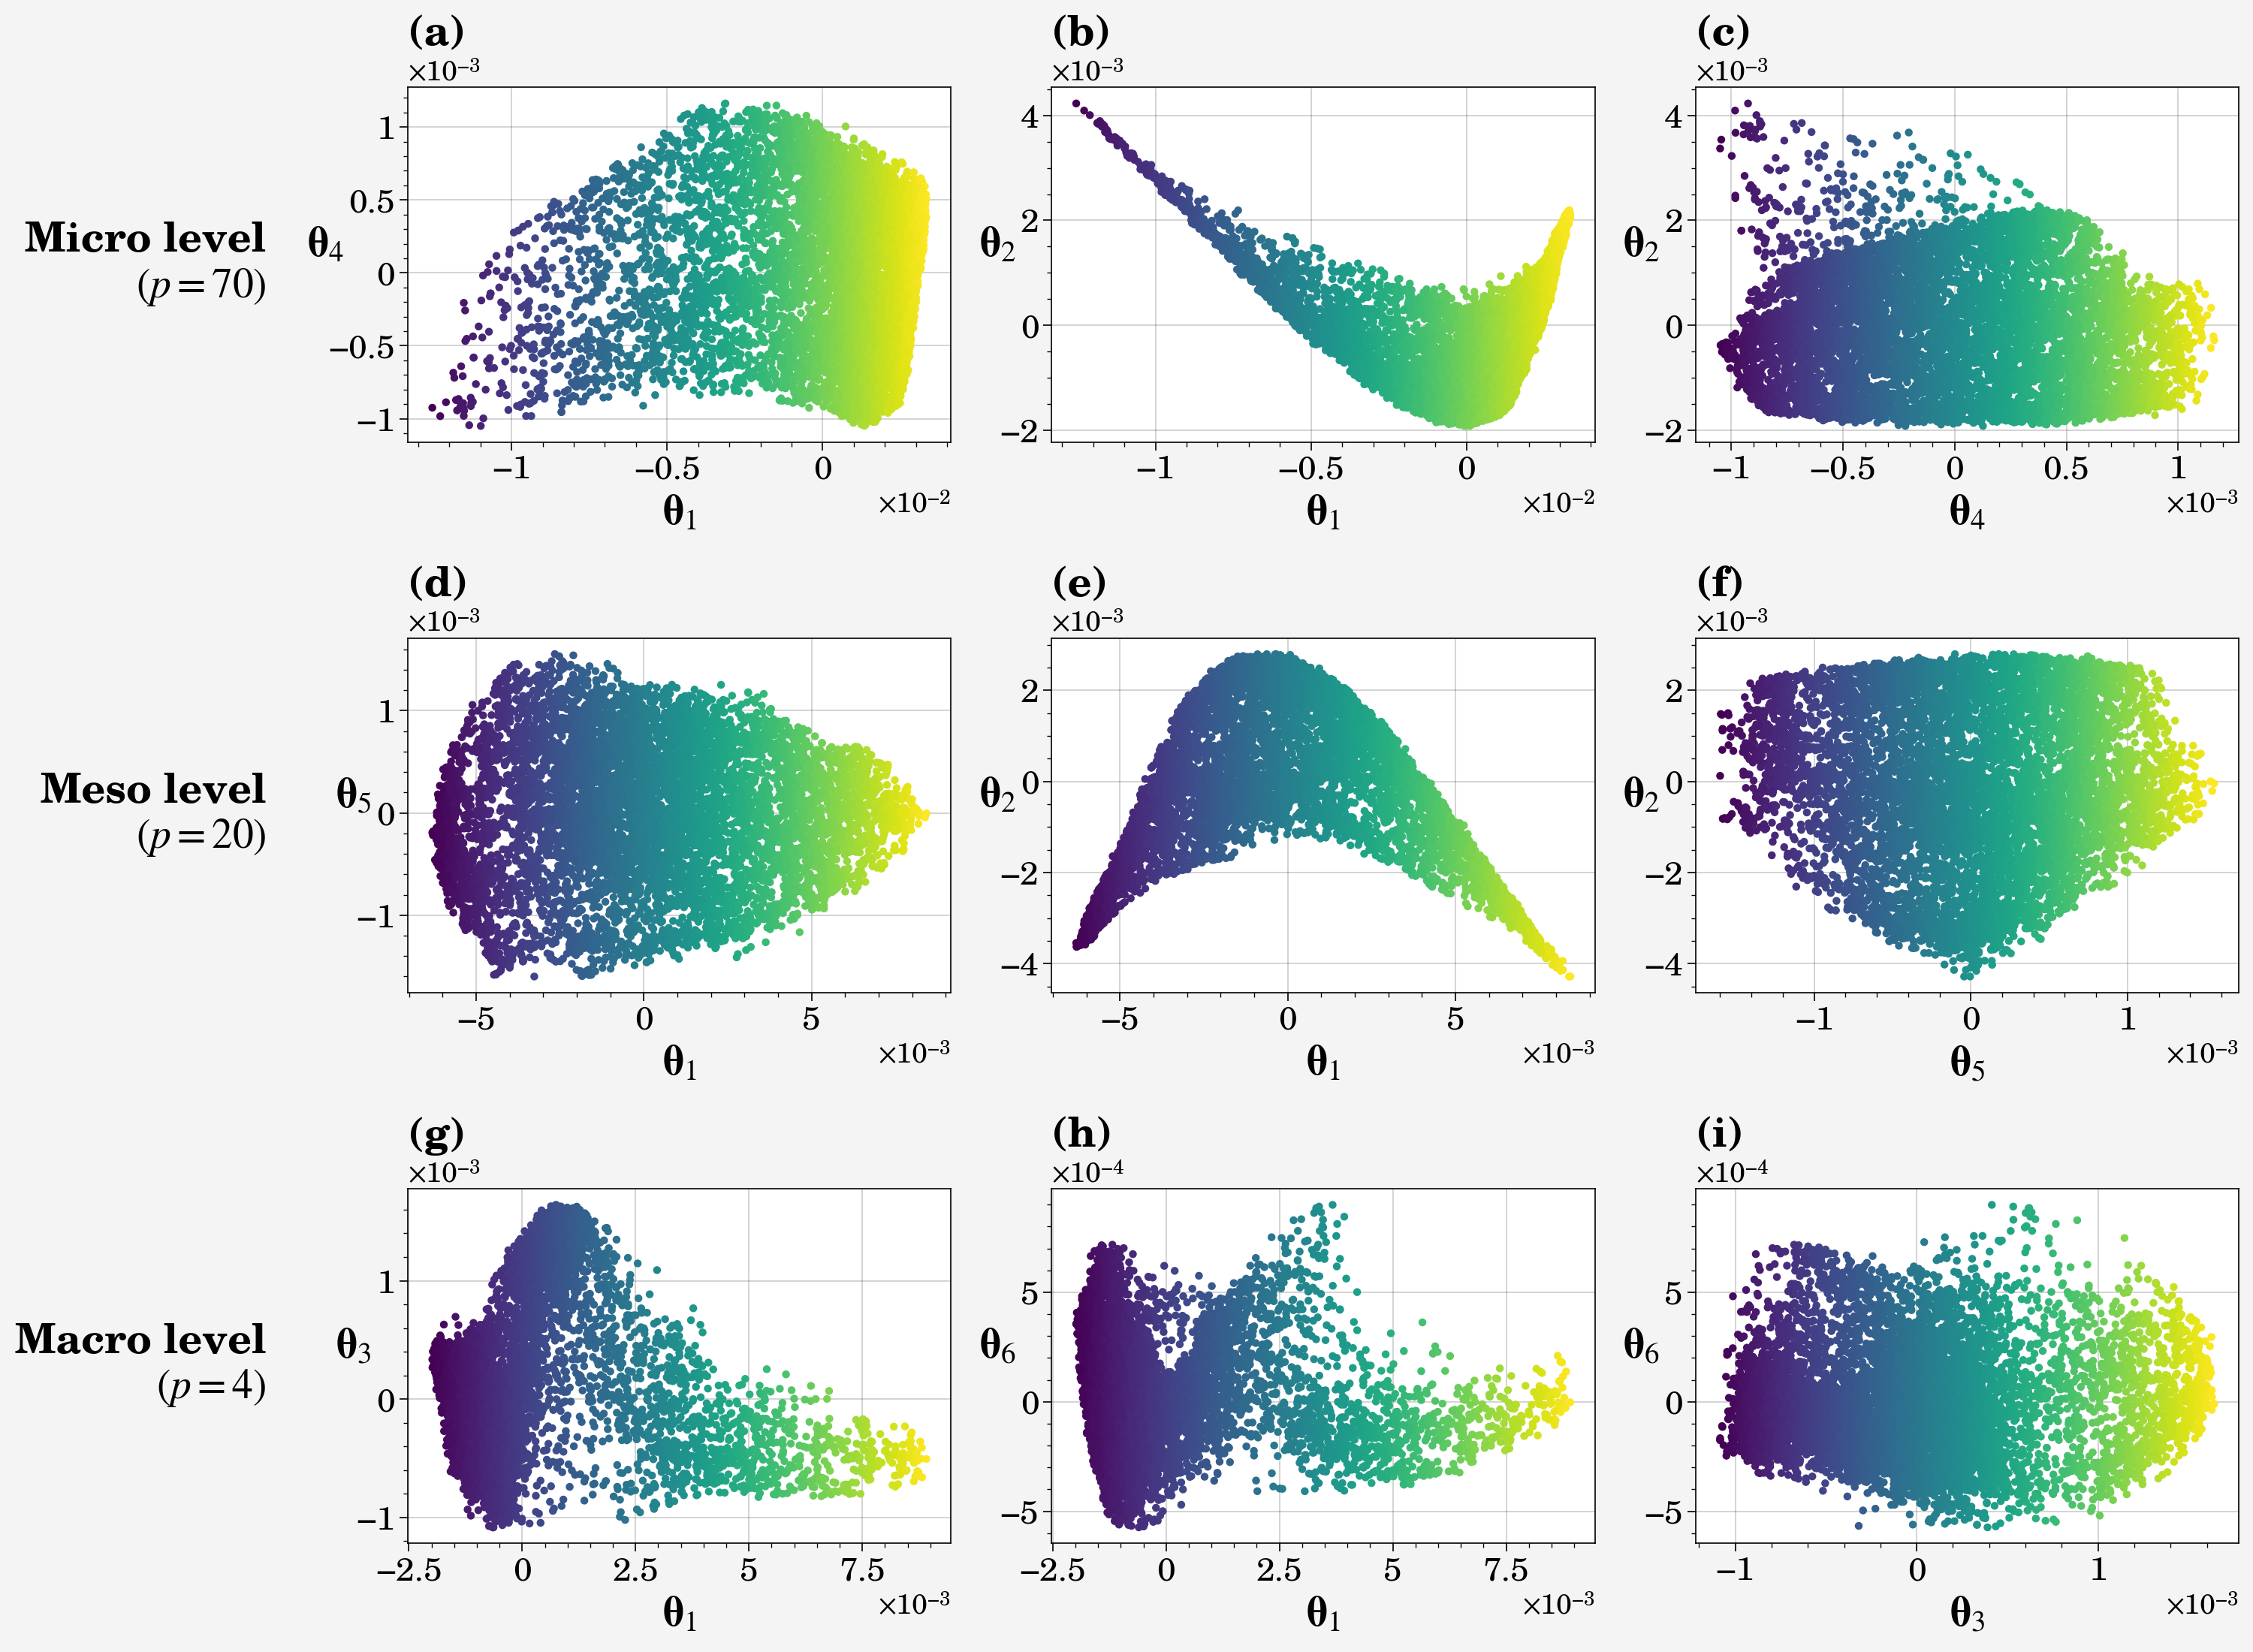

In [11]:
run = 9

fig, axs = pplt.subplots(ncols=3, nrows=3, figsize=(15, 11), sharex=False, sharey=False)

for row, g_data in enumerate(g_data_all_runs):
    axs[row*3].scatter(g_data[run][:, 0], g_data[run][:, 1], 
                       c=g_data[run][:, 0], cmap='viridis', 
                       s=10)

    axs[row*3].format(xlabel=r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][run][0]))
    axs[row*3].set_ylabel(r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][run][1]),
                         labelpad=10)
    
    axs[row*3+1].scatter(g_data[run][:, 0], g_data[run][:, 2], 
                         c=g_data[run][:, 0], cmap='viridis', 
                         s=10)
    axs[row*3+1].format(xlabel=r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][run][0]))
    axs[row*3+1].set_ylabel(r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][run][2]),
                            labelpad=10)

    axs[row*3+2].scatter(g_data[run][:, 1], g_data[run][:, 2], 
                         c=g_data[run][:, 1], cmap='viridis', 
                         s=10)
    axs[row*3+2].format(xlabel=r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][run][1]))
    axs[row*3+2].set_ylabel(r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][run][2]),
                            labelpad=10)
    
    for ax in axs:
        ax.ticklabel_format(style="scientific", scilimits=(-2, -3))
        ax.format(abc='(a)',
                  rc_kw={'title.size': 17,
                         'label.size': 20,
                         'tick.labelsize': 16,
                         'abc.size':  20,
                         'title.pad': 20,
                         'leftlabel.size': 20,
                         'leftlabel.rotation': "horizontal",
                         'leftlabel.pad': 20.0,
                         'leftlabel.color': "k"})
        

axs.format(leftlabels=["Micro level\n"+r"$(p=70)$",
                       "Meso level\n"+r"$(p=20)$", 
                       "Macro level\n"+r"$(p=4)$"])

for i, ax in enumerate(axs):
    ax.yaxis.label.set(rotation='horizontal', ha='left')
    

fig.tight_layout()
plt.savefig(f'plots/appendix/PT6_dcoords_run{run}_parsim.pdf', dpi=300, bbox_inches='tight')
plt.show()       

In [12]:
coord_data = [coords_nonparsim_micro_p_70,
              coords_nonparsim_meso_p_20,
              coords_nonparsim_macro_p_4]
g_data_all_runs = [d_coords_nonparsim_micro_p_70,
                   d_coords_nonparsim_meso_p_20,
                   d_coords_nonparsim_macro_p_4]

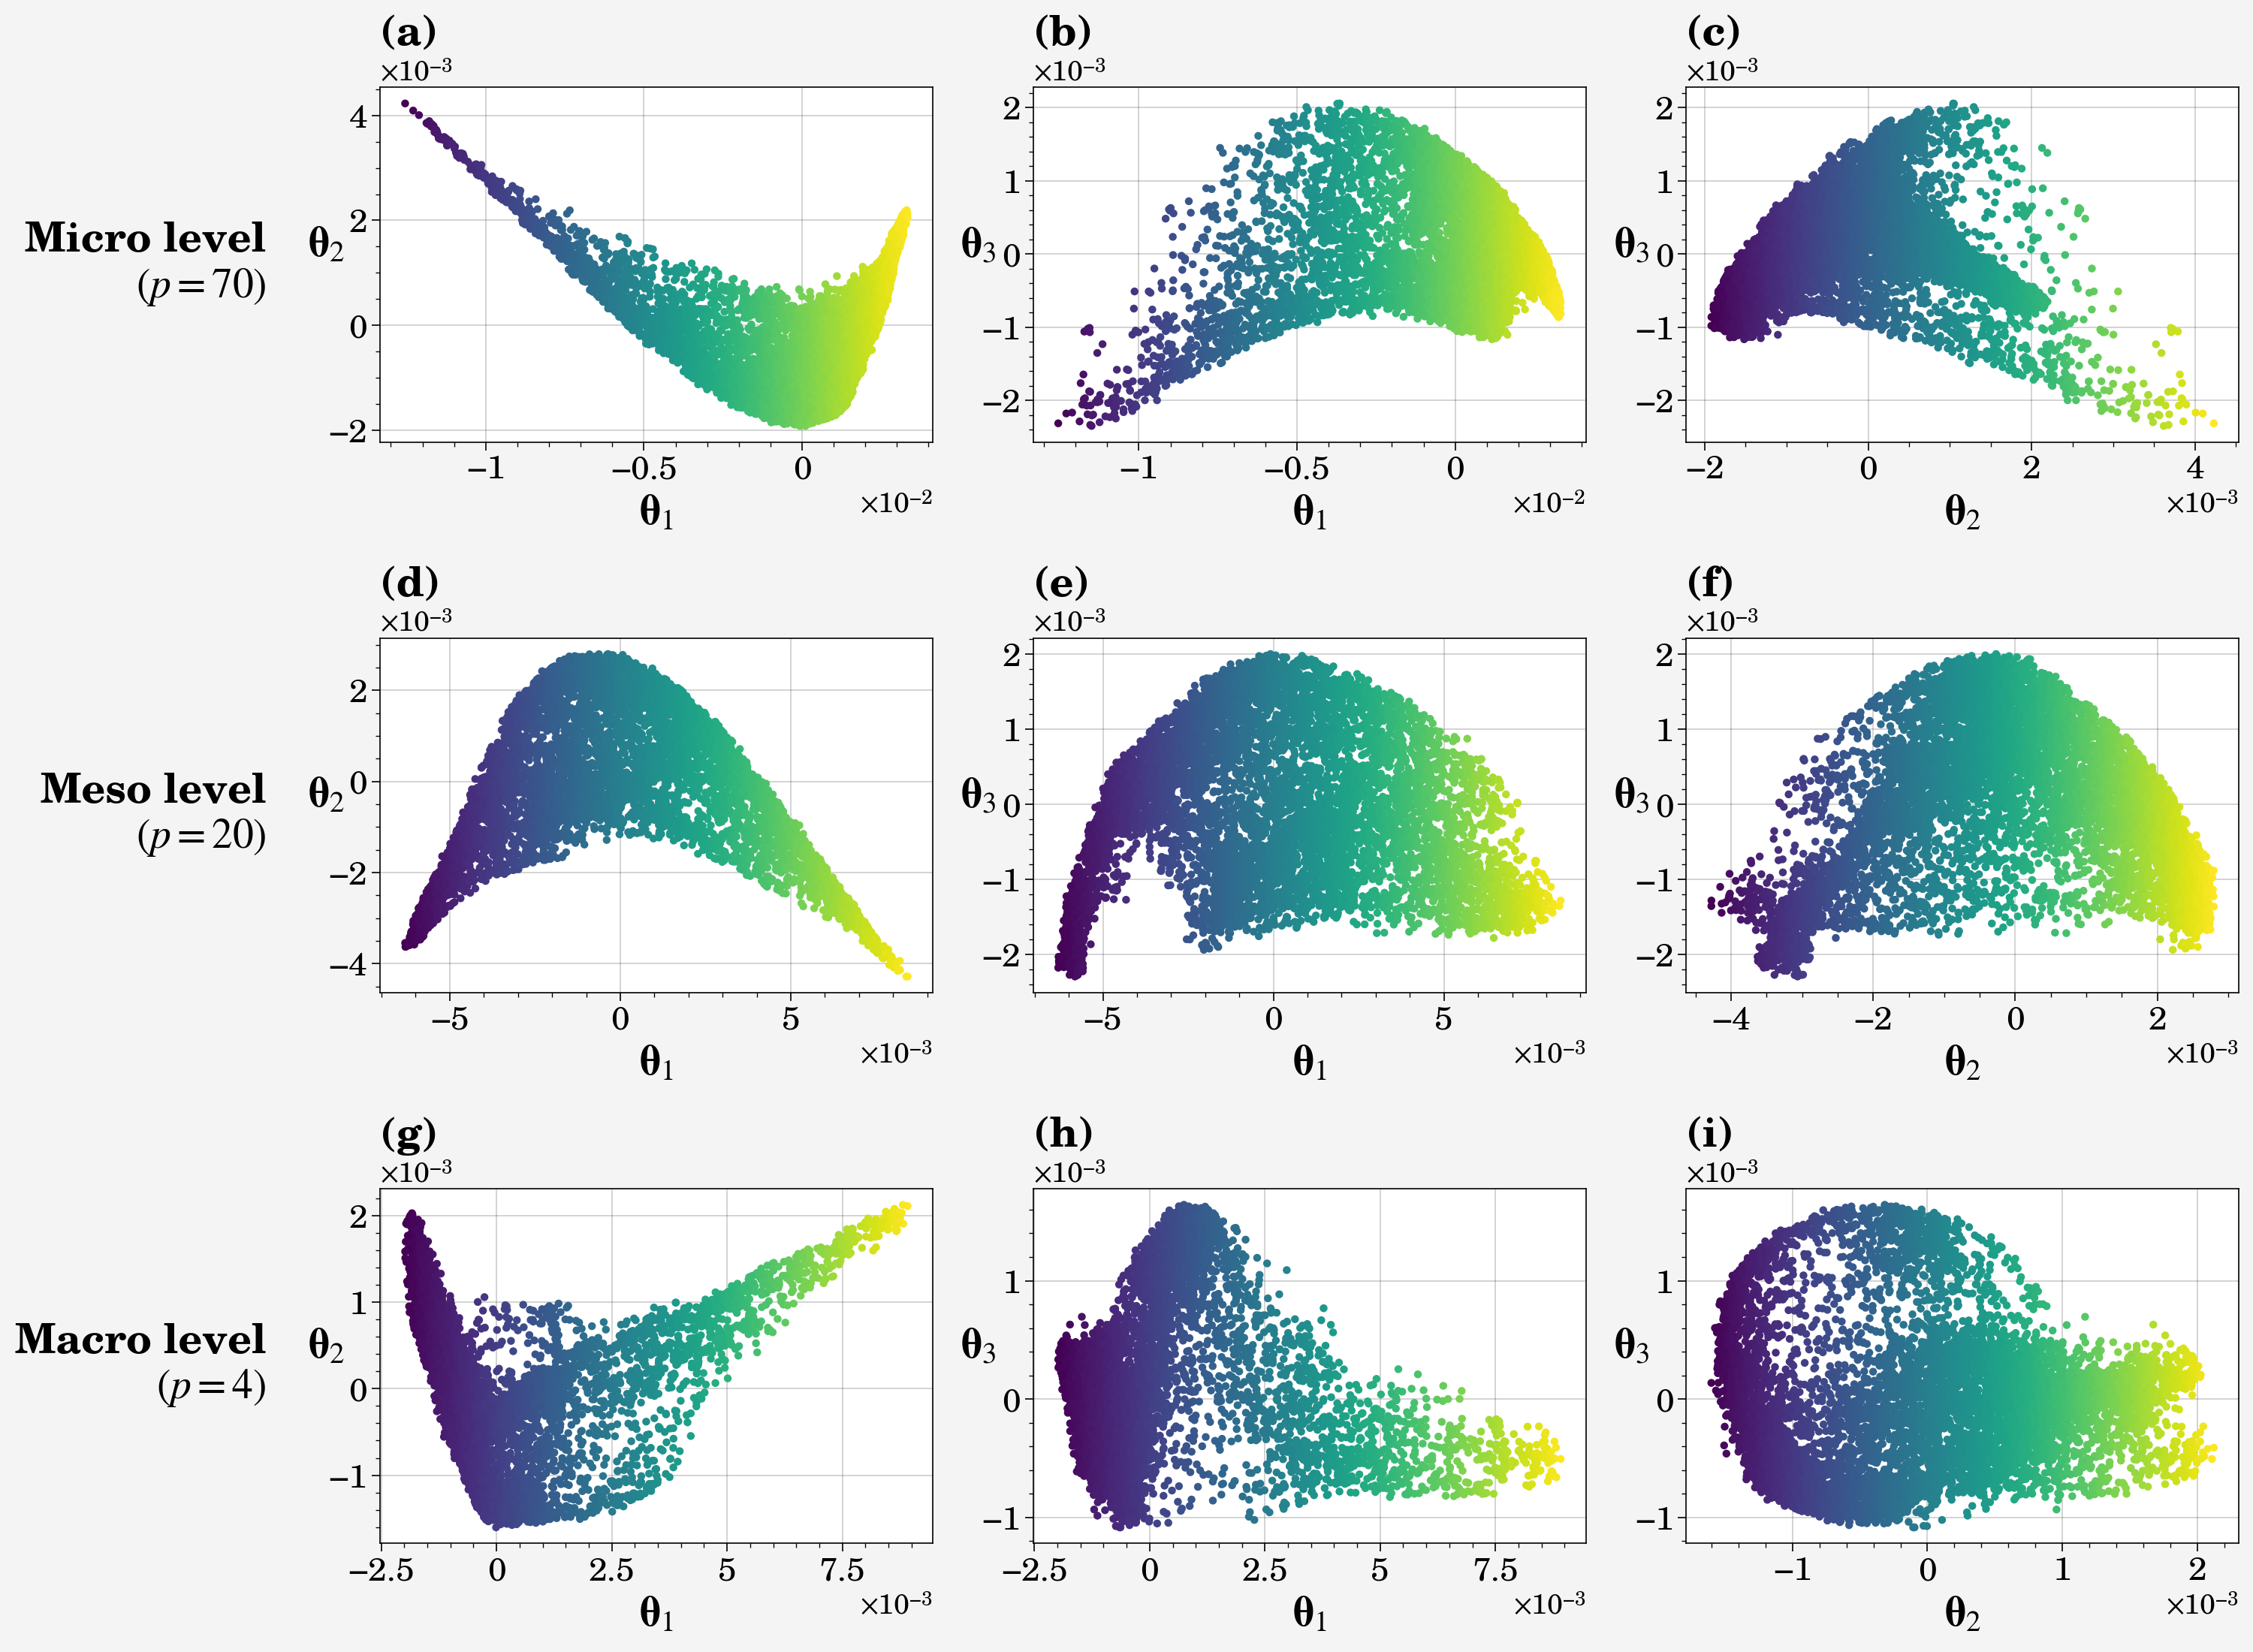

In [13]:
run = 9

fig, axs = pplt.subplots(ncols=3, nrows=3, figsize=(15, 11), sharex=False, sharey=False)

for row, g_data in enumerate(g_data_all_runs):
    axs[row*3].scatter(g_data[run][:, 0], g_data[run][:, 1], 
                       c=g_data[run][:, 0], cmap='viridis', 
                       s=10)

    axs[row*3].format(xlabel=r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][0]))
    axs[row*3].set_ylabel(r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][1]),
                         labelpad=10)
    
    axs[row*3+1].scatter(g_data[run][:, 0], g_data[run][:, 2], 
                         c=g_data[run][:, 0], cmap='viridis', 
                         s=10)
    axs[row*3+1].format(xlabel=r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][0]))
    axs[row*3+1].set_ylabel(r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][2]),
                            labelpad=10)

    axs[row*3+2].scatter(g_data[run][:, 1], g_data[run][:, 2], 
                         c=g_data[run][:, 1], cmap='viridis', 
                         s=10)
    axs[row*3+2].format(xlabel=r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][1]))
    axs[row*3+2].set_ylabel(r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][2]),
                            labelpad=10)
    
    for ax in axs:
        ax.ticklabel_format(style="scientific", scilimits=(-2, -3))
        ax.format(abc='(a)',
                  rc_kw={'title.size': 17,
                         'label.size': 20,
                         'tick.labelsize': 16,
                         'abc.size':  20,
                         'title.pad': 20,
                         'leftlabel.size': 20,
                         'leftlabel.rotation': "horizontal",
                         'leftlabel.pad': 20.0,
                         'leftlabel.color': "k"})
        

axs.format(leftlabels=[
                       "Micro level\n"+r"$(p=70)$",
                       "Meso level\n"+r"$(p=20)$", 
                       "Macro level\n"+r"$(p=4)$"])

for i, ax in enumerate(axs):
    ax.yaxis.label.set(rotation='horizontal', ha='left')
    

fig.tight_layout()
plt.savefig(f'plots/appendix/PT6_nonparsim_dcoords_run{run}.pdf', dpi=300, bbox_inches='tight')
plt.show()       

# GSA with nonparsim diffusion coordinates

In [14]:
PROBLEM = {
    "num_vars" : 6,
    "names"    : ["project_cost",
                  "gain_right",
                  "alpha_beta",
                  "prob_left",
                  "init_w_scale",
                  "poisson_scale"],
    "bounds"   : [[0.01, 2.00],
                  [1.70, 2.30],
                  [0.70, 0.80],
                  [0.30, 0.45],
                  [0.01, 0.15],
                  [8.00, 20.0]]
}
# generate Saltelli samples
NUM_SAMPLES = 1024
x = saltelli.sample(PROBLEM, NUM_SAMPLES, calc_second_order=False)
print(f'Problem bounds: {PROBLEM["bounds"]}')


pdf1 = Uniform(loc=0.01, scale=1.99) 
pdf2 = Uniform(loc=1.70, scale=0.60)  
pdf3 = Uniform(loc=0.70, scale=0.10)  
pdf4 = Uniform(loc=0.30, scale=0.15)  
pdf5 = Uniform(loc=0.01, scale=0.14)  
pdf6 = Uniform(loc=8.00, scale=12.0)
margs = [pdf1, pdf2, pdf3, pdf4, pdf5, pdf6]
joint = JointIndependent(marginals=margs)

Problem bounds: [[0.01, 2.0], [1.7, 2.3], [0.7, 0.8], [0.3, 0.45], [0.01, 0.15], [8.0, 20.0]]


In [15]:
micro_p = 30

s_max = np.linspace(3, 12, 4, dtype='int')

if not os.path.exists(PATH_PT6+f'PCE_GSA/smax_3_12_nonparsim_micro_p_{micro_p}.npz'): 
    PCE_results = two_regressions_PCE(x=x, 
                                      dist_obj=joint,
                                      s_max=s_max,
                                      d_coords=d_coords_nonparsim_micro_p_30,
                                      n_runs=10, 
                                      n_dcoords=3)
    
    np.savez(PATH_PT6+f'PCE_GSA/smax_3_12_nonparsim_micro_p_{micro_p}.npz', 
             x1 = PCE_results[0], # ols_fo_si 
             x2 = PCE_results[1], # ols_to_si
             x3 = PCE_results[2], # ols_error
             x4 = PCE_results[3], # ols_LOO
             x5 = PCE_results[4], # LAR_fo_si
             x6 = PCE_results[5], # LAR_to_si
             x7 = PCE_results[6],# LAR_error
             x8 = PCE_results[7],# LAR_LOO
             x9 = PCE_results[8] # LAR_MAE
            )

In [16]:
micro_p = 70

s_max = np.linspace(3, 12, 4, dtype='int')

if not os.path.exists(PATH_PT6+f'PCE_GSA/smax_3_12_nonparsim_micro_p_{micro_p}.npz'): 
    PCE_results = two_regressions_PCE(x=x, 
                                      dist_obj=joint,
                                      s_max=s_max,
                                      d_coords=d_coords_nonparsim_micro_p_70,
                                      n_runs=10, 
                                      n_dcoords=3)
    
    np.savez(PATH_PT6+f'PCE_GSA/smax_3_12_nonparsim_micro_p_{micro_p}.npz', 
             x1 = PCE_results[0], # ols_fo_si 
             x2 = PCE_results[1], # ols_to_si
             x3 = PCE_results[2], # ols_error
             x4 = PCE_results[3], # ols_LOO
             x5 = PCE_results[4], # LAR_fo_si
             x6 = PCE_results[5], # LAR_to_si
             x7 = PCE_results[6],# LAR_error
             x8 = PCE_results[7],# LAR_LOO
             x9 = PCE_results[8] # LAR_MAE
            )

In [17]:
meso_p = 20

s_max = np.linspace(3, 12, 4, dtype='int')

if not os.path.exists(PATH_PT6+f'PCE_GSA/smax_3_12_nonparsim_meso_p_{meso_p}.npz'): 
    PCE_results = two_regressions_PCE(x=x, 
                                      dist_obj=joint,
                                      s_max=s_max,
                                      d_coords=d_coords_nonparsim_meso_p_20,
                                      n_runs=10, 
                                      n_dcoords=3)
    
    np.savez(PATH_PT6+f'PCE_GSA/smax_3_12_nonparsim_meso_p_{meso_p}.npz', 
             x1 = PCE_results[0], # ols_fo_si 
             x2 = PCE_results[1], # ols_to_si
             x3 = PCE_results[2], # ols_error
             x4 = PCE_results[3], # ols_LOO
             x5 = PCE_results[4], # LAR_fo_si
             x6 = PCE_results[5], # LAR_to_si
             x7 = PCE_results[6],# LAR_error
             x8 = PCE_results[7],# LAR_LOO
             x9 = PCE_results[8] # LAR_MAE
            )

In [18]:
meso_p = 70

s_max = np.linspace(3, 12, 4, dtype='int')

if not os.path.exists(PATH_PT6+f'PCE_GSA/smax_3_12_nonparsim_meso_p_{meso_p}.npz'): 
    PCE_results = two_regressions_PCE(x=x, 
                                      dist_obj=joint,
                                      s_max=s_max,
                                      d_coords=d_coords_nonparsim_meso_p_70,
                                      n_runs=10, 
                                      n_dcoords=3)
    
    np.savez(PATH_PT6+f'PCE_GSA/smax_3_12_nonparsim_meso_p_{meso_p}.npz', 
             x1 = PCE_results[0], # ols_fo_si 
             x2 = PCE_results[1], # ols_to_si
             x3 = PCE_results[2], # ols_error
             x4 = PCE_results[3], # ols_LOO
             x5 = PCE_results[4], # LAR_fo_si
             x6 = PCE_results[5], # LAR_to_si
             x7 = PCE_results[6],# LAR_error
             x8 = PCE_results[7],# LAR_LOO
             x9 = PCE_results[8] # LAR_MAE
            )

In [19]:
macro_p = 4

s_max = np.linspace(3, 12, 4, dtype='int')

if not os.path.exists(PATH_PT6+f'PCE_GSA/smax_3_12_nonparsim_macro_p_{macro_p}.npz'): 
    PCE_results = two_regressions_PCE(x=x, 
                                      dist_obj=joint,
                                      s_max=s_max,
                                      d_coords=d_coords_nonparsim_macro_p_4,
                                      n_runs=10, 
                                      n_dcoords=3)
    
    np.savez(PATH_PT6+f'PCE_GSA/smax_3_12_nonparsim_macro_p_{macro_p}.npz', 
             x1 = PCE_results[0], # ols_fo_si 
             x2 = PCE_results[1], # ols_to_si
             x3 = PCE_results[2], # ols_error
             x4 = PCE_results[3], # ols_LOO
             x5 = PCE_results[4], # LAR_fo_si
             x6 = PCE_results[5], # LAR_to_si
             x7 = PCE_results[6],# LAR_error
             x8 = PCE_results[7],# LAR_LOO
             x9 = PCE_results[8] # LAR_MAE
            )

## Sensitivity Indices

In [20]:
def plot_GSA_OLS_LAR(SIs, suptitle, figsize, legend_n_cols, toplabels, title, top=True):
    
    n_res = len(SIs)
    
    n_d_coord = 3
    
    s_max = np.linspace(3, 12, 4, dtype='int')

    param_names = [r"$COST$", r"$G_{upper}$", r"$\beta$", r"$\ell$", r"$\sigma_w$", r"$\lambda$"]
    colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#e377c2']
    marker_styles = ['d', 'X','o', 'v', 'P', 's', '*']
    
    fig, axs = pplt.subplots(ncols=n_res, nrows=3, figsize=figsize, sharex=True, sharey=True)
    
    for d in range(n_d_coord):
        for i, param in enumerate(param_names):
            for j, si in enumerate(SIs):

                axs[d,j].scatter(s_max, si.mean(axis=0)[:, i, d], label=param,
                                 color=colors[i], edgecolor="k", marker=marker_styles[i], 
                                 markersize=80, linewidth=0.4, zorder=3)
                axs[d,j].errorbar(s_max, si.mean(axis=0)[:, i, d],
                                  si.var(axis=0, ddof=1)[:, i, d],
                                  markeredgewidth=1.4, color=colors[i],
                                  linestyle='--', capsize=7, alpha=1, elinewidth=1) 
     
   
    axs.format(toplabels=toplabels,
              suptitle=suptitle,
              leftlabels=["1st\n"+r"$\mathbf{\theta}$", 
                         "2nd\n"+r"$\mathbf{\theta}$",
                         "3rd\n"+r"$\mathbf{\theta}$"],)


    for i, ax in enumerate(axs):
        ax.format(abc='(a)')
        ax.set(ylim=(-0.06, 0.904))
        ax.format(rc_kw={'suptitle.size': 22,
                         'suptitle.pad': 5.0,
                         'suptitle.color': "k",
                         'abc.size': 20,
                         'title.size': 22,
                         'title.pad': 3.0,
                         'label.size': 22,
                         'tick.labelsize': 17,
                         'leftlabel.size': 20,
                         'toplabel.size': 22,
                         'toplabel.pad': 1.0,
                         'leftlabel.rotation': "horizontal",
                         'leftlabel.pad': 14.0})
    
    axs.set_xticks(s_max,
                  ['{}'.format(num) for num in s_max])
    
    axs.set_xlabel(r'Maximum polynomial degree $s_{\mathrm{max}}$', fontsize=22, labelpad=5)
    
    if top:
        lgnd = fig.legend(param_names, ncols=legend_n_cols, frame=True, loc='t',
                          fontsize = 22, bbox_to_anchor=(0.5, 5), 
                          title="Uncertain parameters:", title_fontsize=20)
        for i in range(len(param_names)):
            lgnd.legendHandles[i]._sizes = [100]
            
    for i, ax in enumerate(axs):
        ax.yaxis.label.set(rotation='horizontal', ha='right')

    fig.tight_layout()
    plt.savefig(f'plots/appendix/' + title, bbox_inches='tight')    
    plt.show()

In [21]:
GSA_micro_p_70 = np.load(PATH_PT6 + f'PCE_GSA/smax_3_12_nonparsim_micro_p_70.npz', 
                            allow_pickle=True)

LAR_fo_si_micro_p_70 = GSA_micro_p_70['x5']
LAR_to_si_micro_p_70 = GSA_micro_p_70['x6']


GSA_meso_p_20 = np.load(PATH_PT6 + f'PCE_GSA/smax_3_12_nonparsim_meso_p_20.npz', 
                            allow_pickle=True)

LAR_fo_si_meso_p_20 = GSA_meso_p_20['x5']
LAR_to_si_meso_p_20 = GSA_meso_p_20['x6']


GSA_macro_p_4 = np.load(PATH_PT6 + f'PCE_GSA/smax_3_12_nonparsim_macro_p_4.npz', 
                            allow_pickle=True)

LAR_fo_si_macro_p_4 = GSA_macro_p_4['x5']
LAR_to_si_macro_p_4 = GSA_macro_p_4['x6']


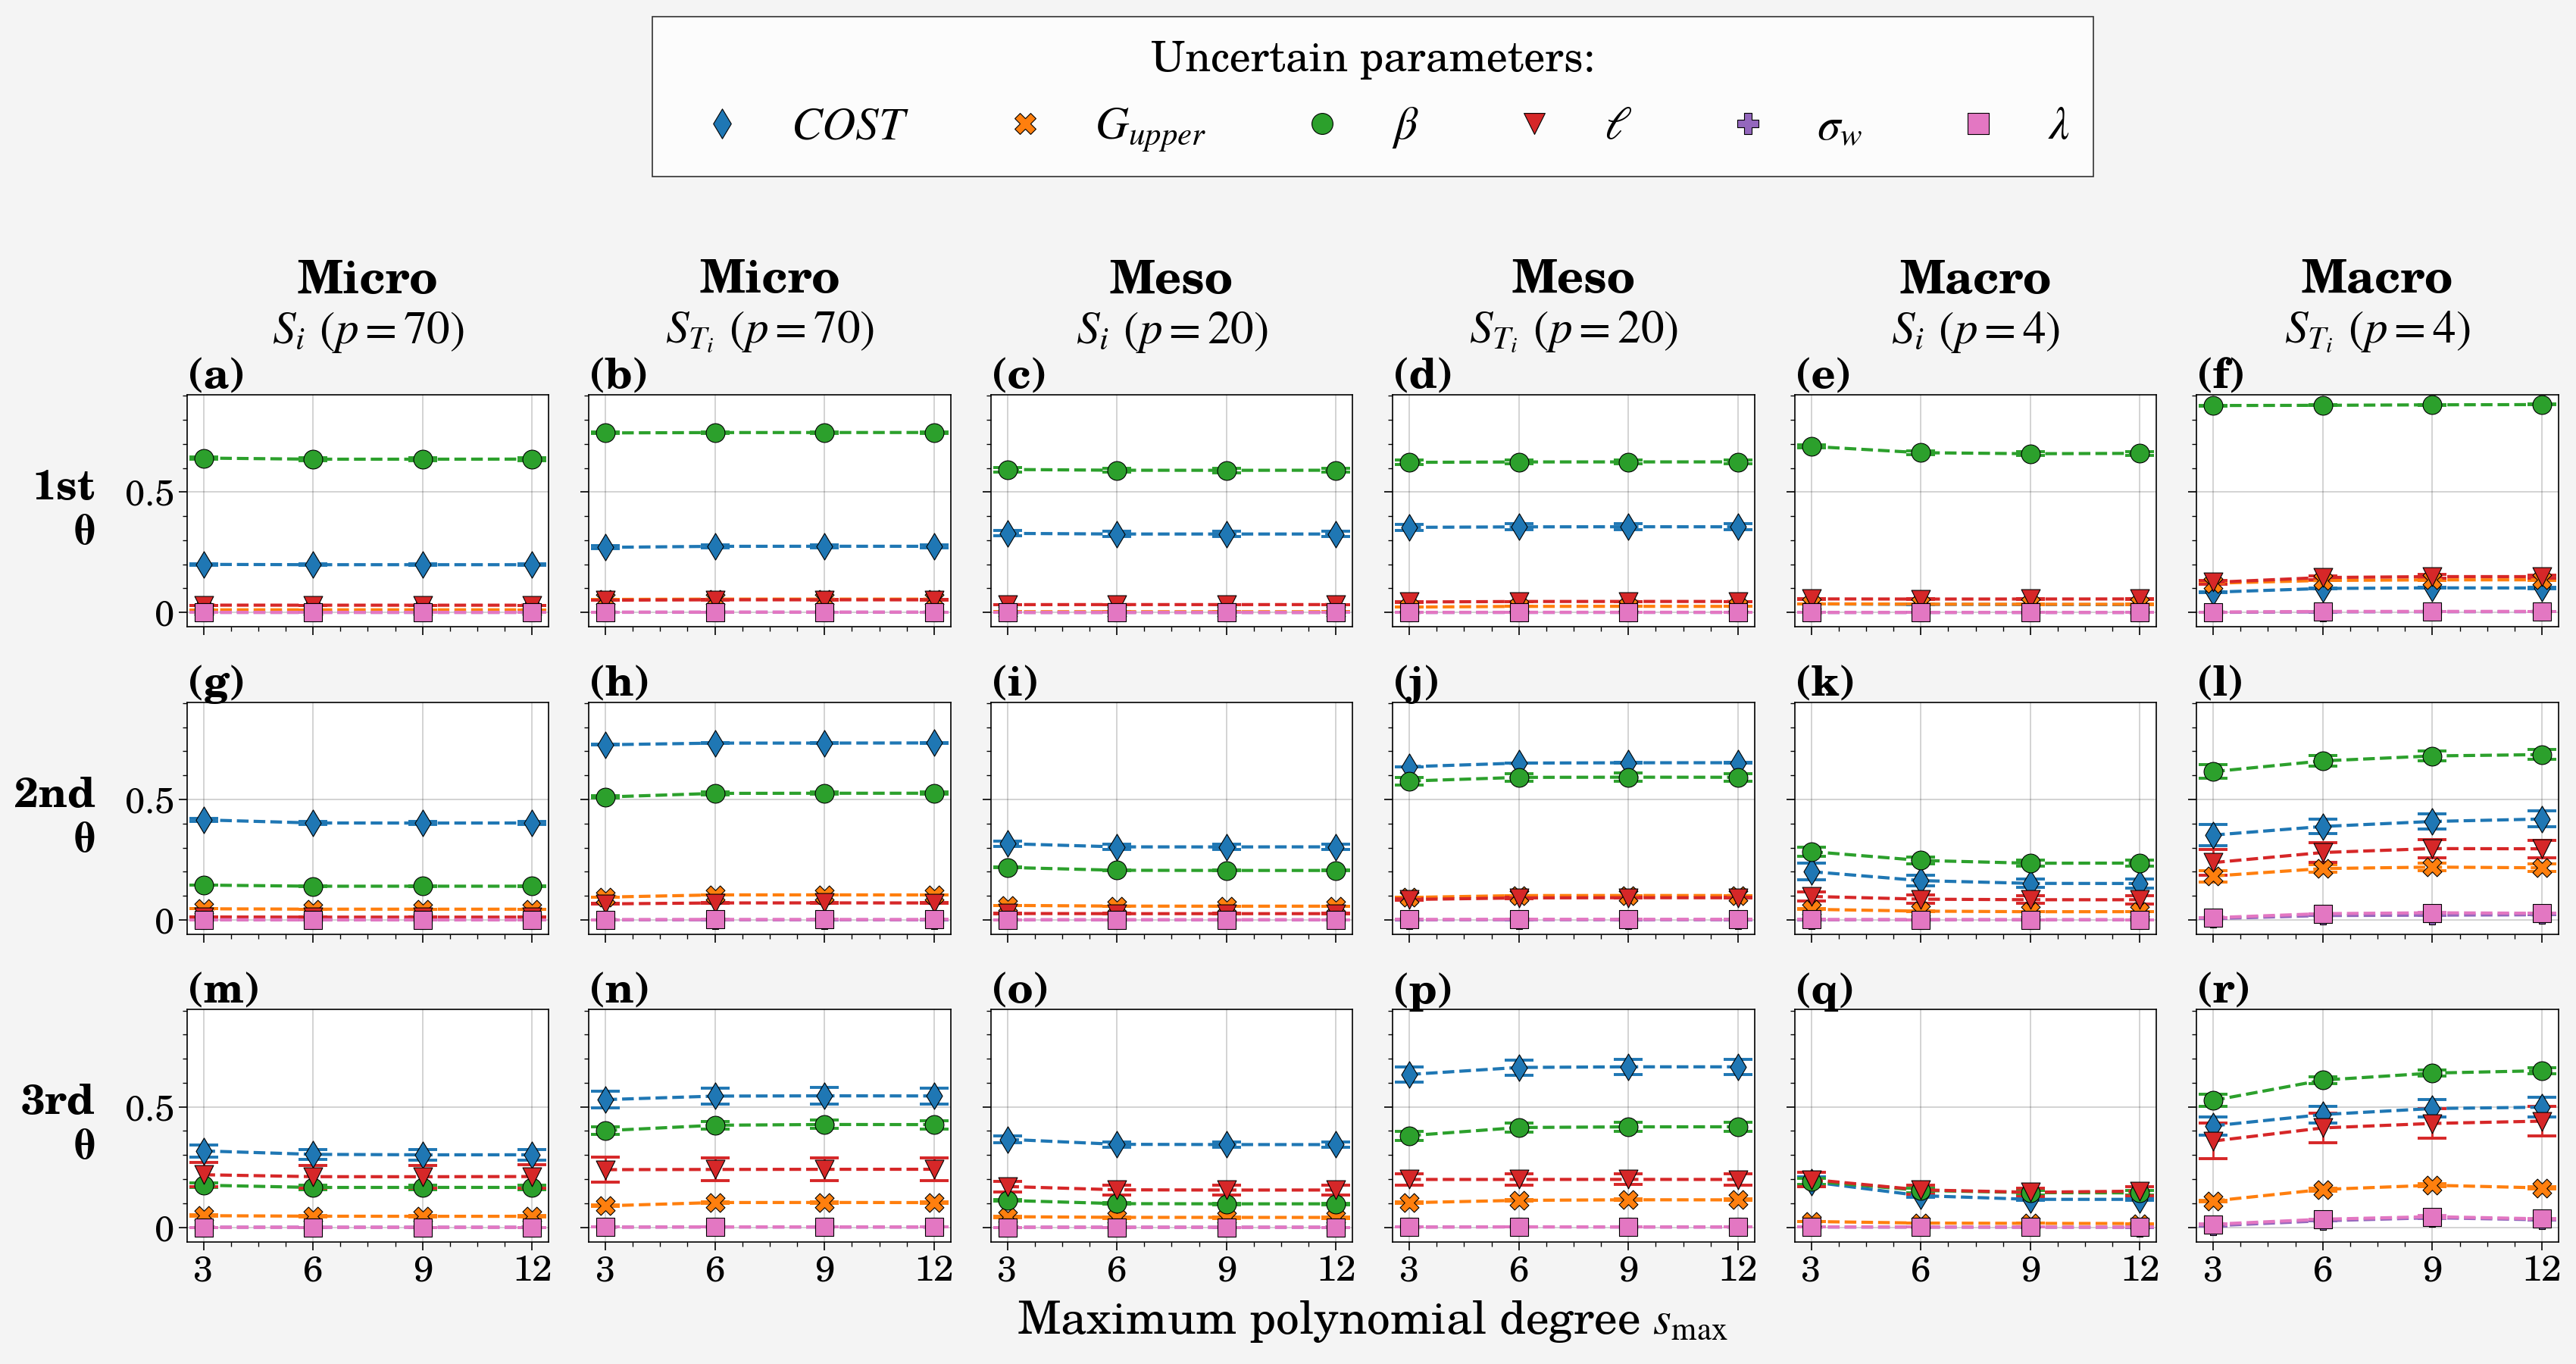

In [22]:
plot_GSA_OLS_LAR(SIs = [LAR_fo_si_micro_p_70, LAR_to_si_micro_p_70,
                        LAR_fo_si_meso_p_20, LAR_to_si_meso_p_20,
                       LAR_fo_si_macro_p_4, LAR_to_si_macro_p_4],
                 figsize = (17, 9),
                 suptitle = None,
                 legend_n_cols  = 6,
                 toplabels = ("Micro\n"+r'$S_{i}$ $({p=70})$', 
                              "Micro\n"+r'$S_{T_i}$ $({p=70})$', 
                              "Meso\n"+r'$S_{i}$ $({p=20})$', 
                              "Meso\n"+r'$S_{T_i}$ $({p=20})$',
                              "Macro\n"+r'$S_{i}$ $({p=4})$', 
                              "Macro\n"+r'$S_{T_i}$ $({p=4})$',),
                 title = "PT6_GSA_LAR_nonparsim.pdf")



In [23]:
GSA_micro_p_70 = np.load(PATH_PT6 + f'PCE_GSA/smax_3_12_parsim_micro_p_70.npz', 
                            allow_pickle=True)

LAR_fo_si_micro_p_70_parsim = GSA_micro_p_70['x5']
LAR_to_si_micro_p_70_parsim = GSA_micro_p_70['x6']


GSA_meso_p_20 = np.load(PATH_PT6 + f'PCE_GSA/smax_3_12_parsim_meso_p_20.npz', 
                            allow_pickle=True)

LAR_fo_si_meso_p_20_parsim = GSA_meso_p_20['x5']
LAR_to_si_meso_p_20_parsim = GSA_meso_p_20['x6']


GSA_macro_p_4 = np.load(PATH_PT6 + f'PCE_GSA/smax_3_12_parsim_macro_p_4.npz', 
                            allow_pickle=True)

LAR_fo_si_macro_p_4_parsim = GSA_macro_p_4['x5']
LAR_to_si_macro_p_4_parsim = GSA_macro_p_4['x6']

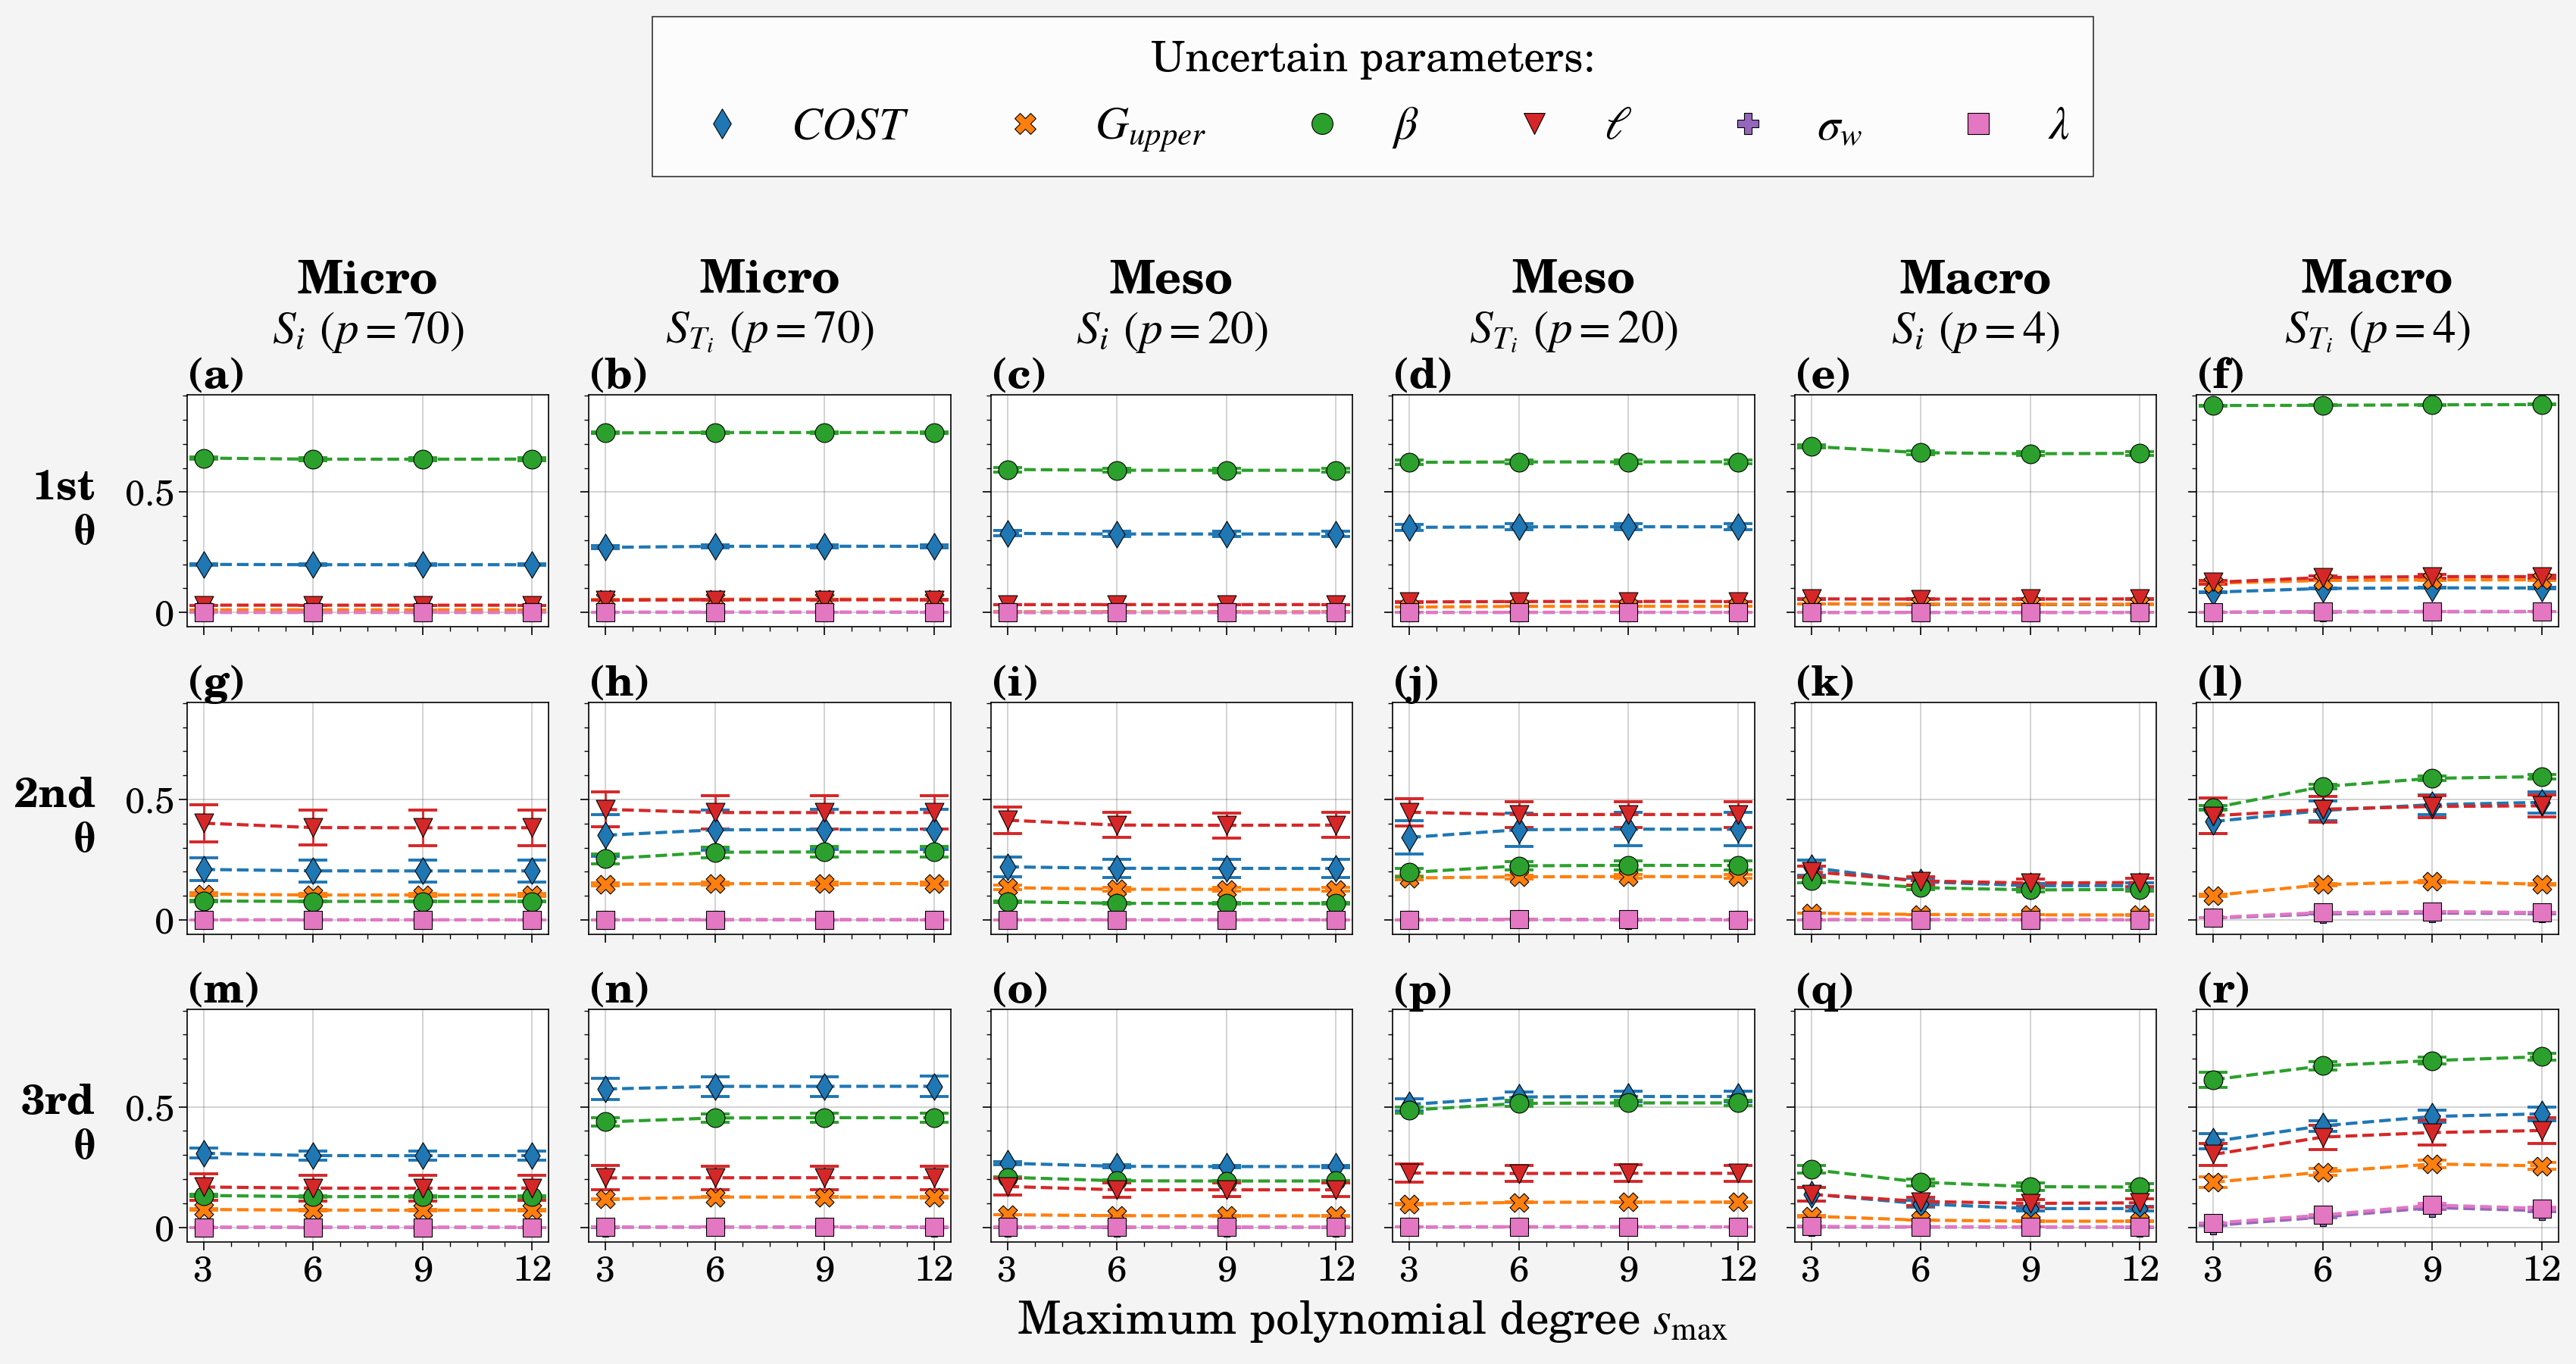

In [24]:
plot_GSA_OLS_LAR(SIs = [LAR_fo_si_micro_p_70_parsim, LAR_to_si_micro_p_70_parsim,
                        LAR_fo_si_meso_p_20_parsim, LAR_to_si_meso_p_20_parsim,
                       LAR_fo_si_macro_p_4_parsim, LAR_to_si_macro_p_4_parsim],
                 figsize = (17, 9),
                 suptitle = None,
                 legend_n_cols  = 6,
                 toplabels = ("Micro\n"+r'$S_{i}$ $({p=70})$', 
                              "Micro\n"+r'$S_{T_i}$ $({p=70})$', 
                              "Meso\n"+r'$S_{i}$ $({p=20})$', 
                              "Meso\n"+r'$S_{T_i}$ $({p=20})$',
                              "Macro\n"+r'$S_{i}$ $({p=4})$', 
                              "Macro\n"+r'$S_{T_i}$ $({p=4})$',),
                 title = "PT6_GSA_LAR_parsim.pdf")



In [27]:
def plot_LAR_SIs_all_levels(SIs, figsize, subplot_titles, legend_space, title, toplabels):
    
    param_names = [r"$COST$", r"$G_{upper}$", r"$\beta$", r"$\ell$", r"$\sigma_w$", r"$\lambda$"]
    colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#e377c2']
    marker_styles = ['d', 'X','o', 'v', 'P', 's', '*']
    
    n_rows = int(len(SIs)/4)
    n_cols = int(len(SIs)/3)

    fig, axs = pplt.subplots(ncols=n_cols, nrows=n_rows, figsize=figsize, sharex=True, sharey=True)
    

    for j, si in enumerate(SIs):
        for i, param in enumerate(param_names):
            
            axs[j].scatter([1,2,3], np.mean(si,axis=0)[i], label=param,
                             color=colors[i], edgecolor="k", marker=marker_styles[i], 
                             markersize=80, linewidth=0.4, zorder=3)
            axs[j].errorbar([1,2,3], np.mean(si,axis=0)[i],
                                  si.var(axis=0, ddof=1)[i],
                                  markeredgewidth=1.4, color=colors[i],
                                  linestyle='--', capsize=7, alpha=1, elinewidth=1) 
            axs[j].set_title(subplot_titles[j])
            
    for ax in axs:
        ax.set_xlim(0.9, 3.1)
        ax.set_ylim(-0.05, 1.05)
      
    ticks = [1,2,3]
    axs.set_xticks(ticks, ['1st '+r"$\mathbf{\theta}$", 
                           '2nd '+r"$\mathbf{\theta}$",
                           '3rd '+r"$\mathbf{\theta}$"])
    
    for i, ax in enumerate(axs):
        ax.format(abc='(a)',  xlabel=r'Diffusion cooordinates $\vartheta$',
                  toplabels=toplabels)
        ax.format(rc_kw={'suptitle.size': 20,
                         'suptitle.pad': 8.0,
                         'title.size': 20,
                         'title.pad': 10,
                         'abc.bboxpad': 10.0,
                         'abc.size': 20,
                         'label.size': 22,
                         'tick.labelsize': 17,
                         'leftlabel.size': 20,
                         'toplabel.size': 20,
                         'toplabel.pad': 5.0,
                         'leftlabel.rotation': "horizontal",
                         'leftlabel.pad': 14.0})
        
    lgnd = fig.legend(param_names, ncols=6, frame=True, loc='t',
                      fontsize = 20, bbox_to_anchor=(0.5, legend_space),
                      title="Uncertain parameters:", title_fontsize=20)
    for i in range(len(param_names)):
        lgnd.legendHandles[i]._sizes = [100]
    
    fig.tight_layout()
    plt.savefig(f'plots/main_text/' + title, bbox_inches='tight')
    plt.show()  

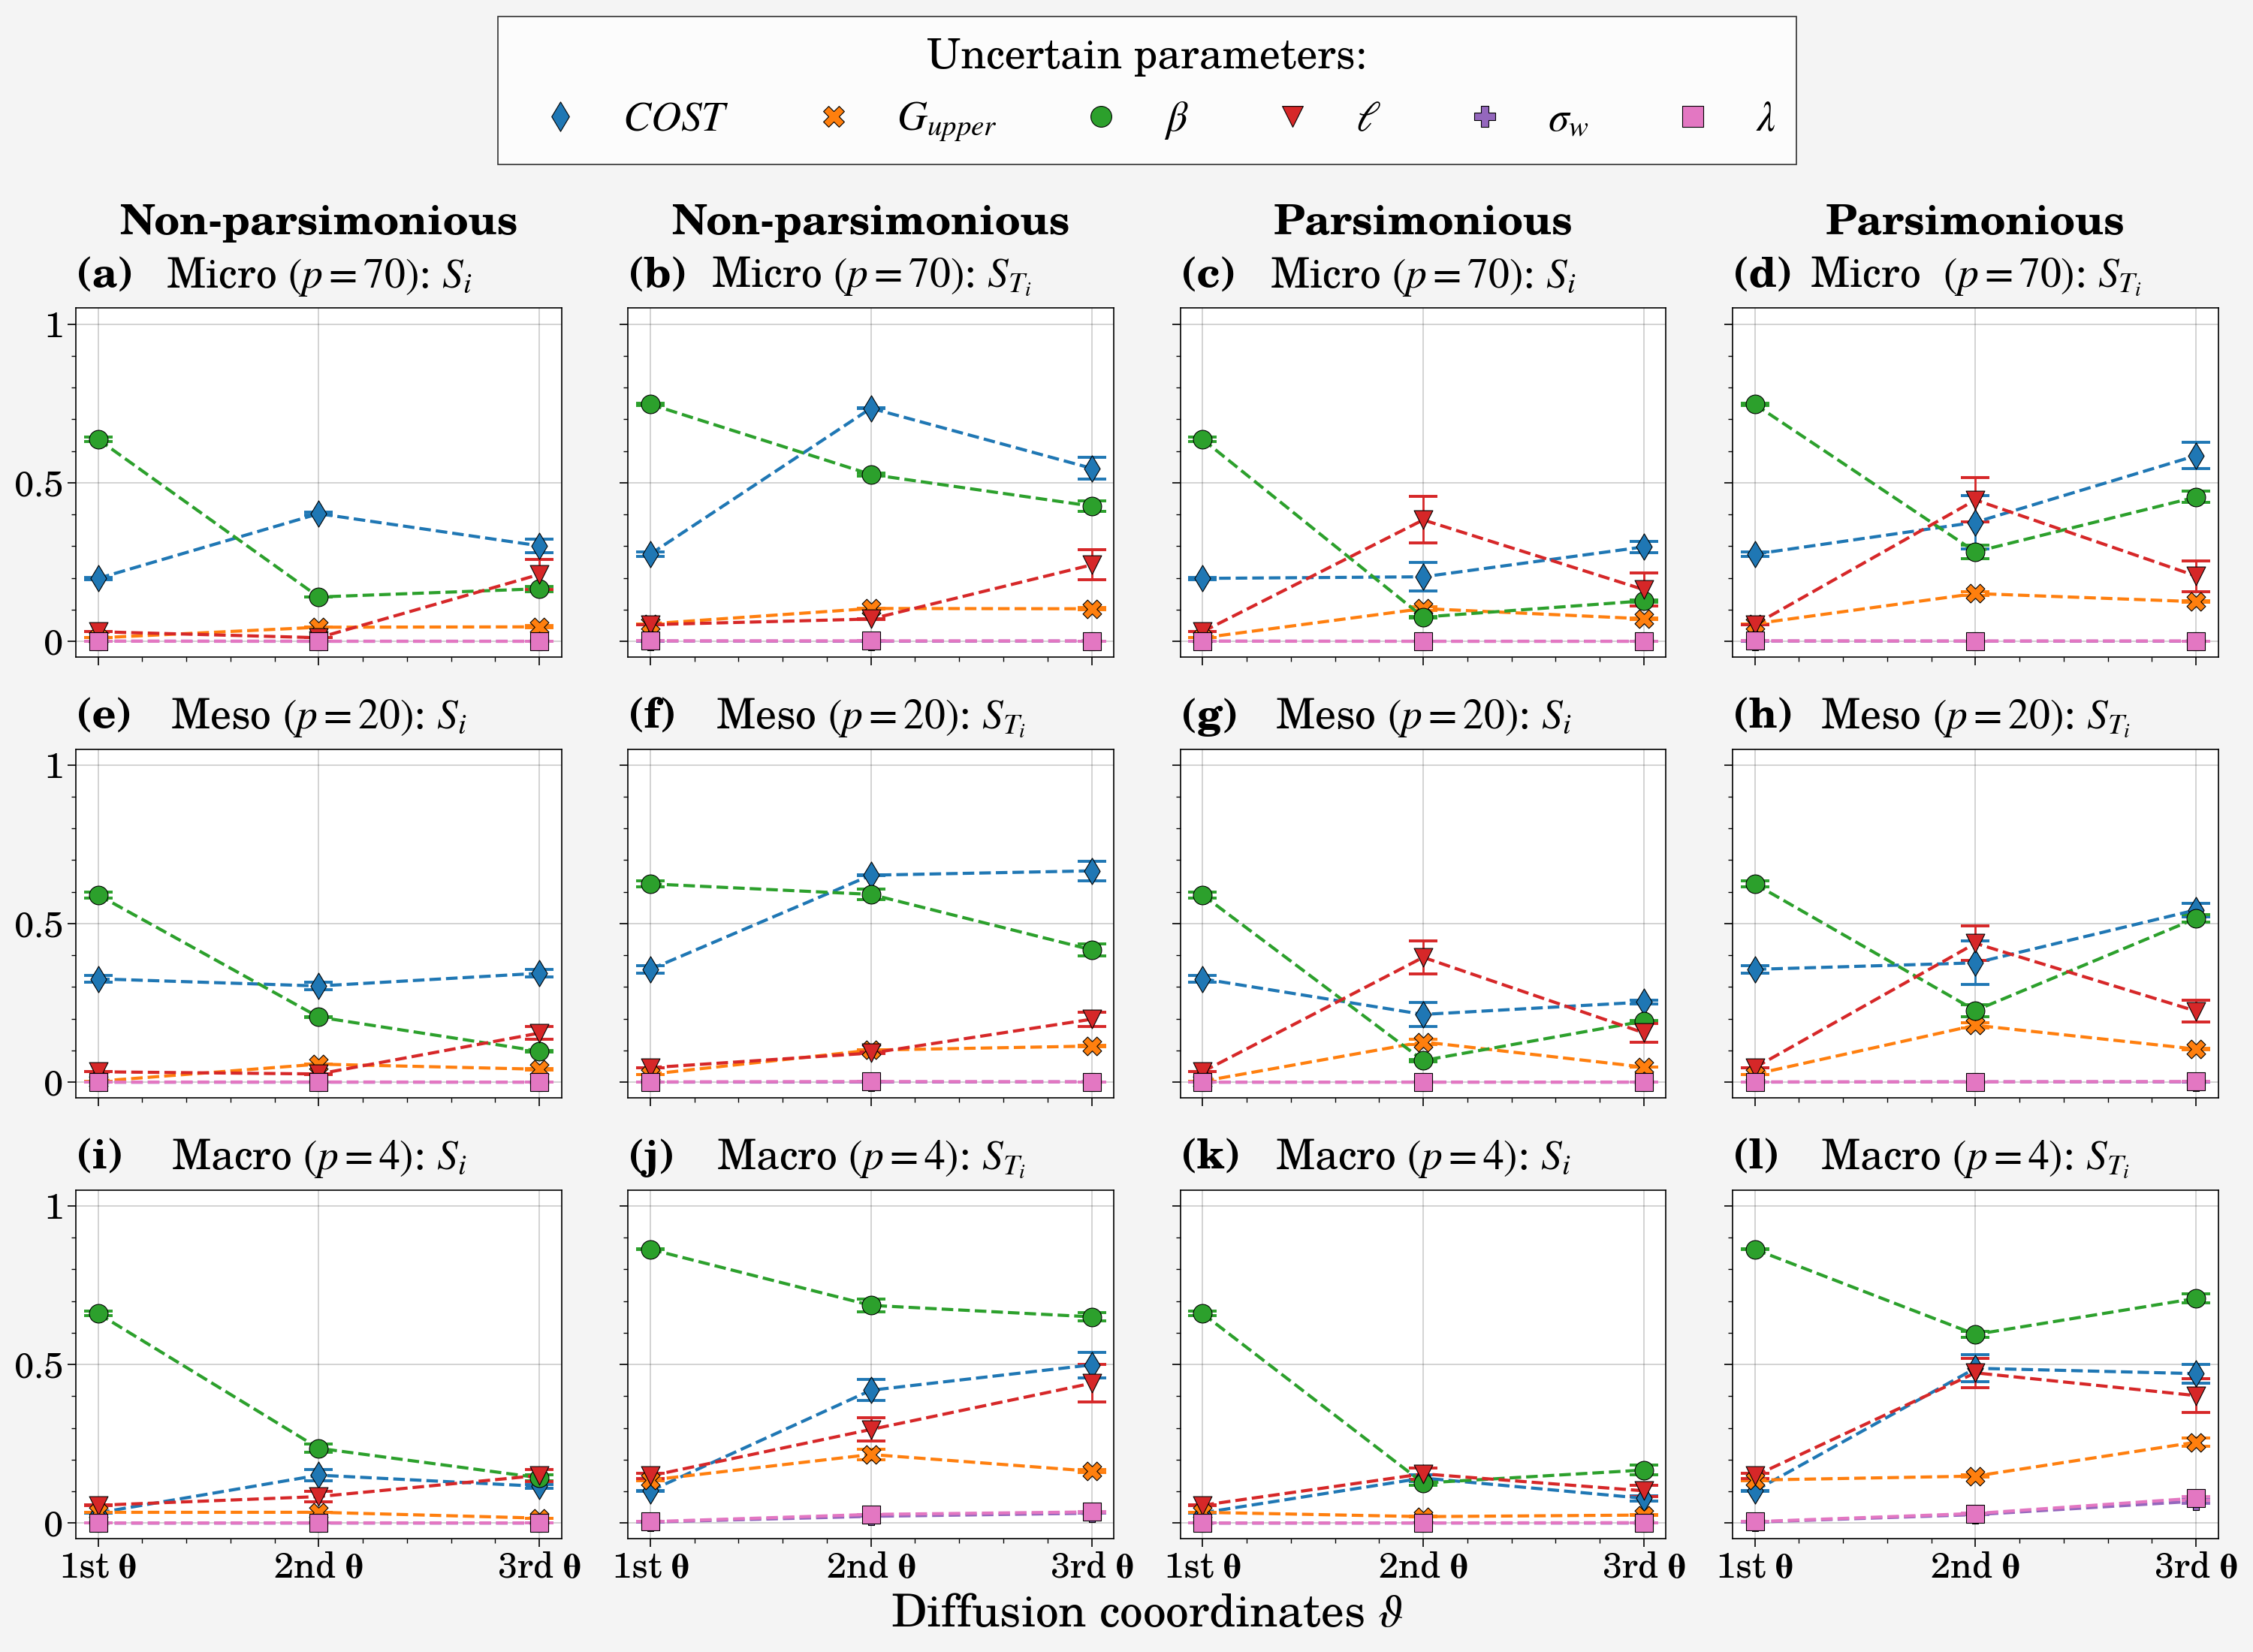

In [28]:
plot_LAR_SIs_all_levels(SIs = [LAR_fo_si_micro_p_70[:, -1, :, :], 
                               LAR_to_si_micro_p_70[:, -1, :, :],
                               LAR_fo_si_micro_p_70_parsim[:, -1, :, :],
                               LAR_to_si_micro_p_70_parsim[:, -1, :, :],
                               LAR_fo_si_meso_p_20[:, -1, :, :], 
                               LAR_to_si_meso_p_20[:, -1, :, :],
                               LAR_fo_si_meso_p_20_parsim[:, -1, :, :], 
                               LAR_to_si_meso_p_20_parsim[:, -1, :, :],
                               LAR_fo_si_macro_p_4[:, -1, :, :],
                               LAR_to_si_macro_p_4[:, -1, :, :],
                               LAR_fo_si_macro_p_4_parsim[:, -1, :, :],
                               LAR_to_si_macro_p_4_parsim[:, -1, :, :]],
                         subplot_titles = [r'Micro $({p=70})$: $S_{i}$',
                                           r'Micro $({p=70})$: $S_{T_i}$',
                                           r'Micro $({p=70})$: $S_{i}$',
                                           r'Micro  $({p=70})$: $S_{T_i}$',
                                           r'Meso $({p=20})$: $S_{i}$',
                                           r'Meso $({p=20})$: $S_{T_i}$',
                                           r'Meso $({p=20})$: $S_{i}$',
                                           r'Meso $({p=20})$: $S_{T_i}$',
                                           r'Macro $({p=4})$: $S_{i}$',
                                           r'Macro $({p=4})$: $S_{T_i}$',
                                           r'Macro $({p=4})$: $S_{i}$',
                                           r'Macro $({p=4})$: $S_{T_i}$'],
                         toplabels = ("Non-parsimonious", "Non-parsimonious", 
                                      "Parsimonious", "Parsimonious"),
                         legend_space = 2,
                         figsize=(15,  11),
                         title = "PT6_GSA_10_runs.pdf")

## PCE all errors

In [79]:
def plot_GSA_errors(errors, n_plot_cols, n_plot_rows, suptitle, figsize, legend_n_cols, 
                    toplabels, leftlabels, title, legend_space, top=True):
    
    dcoords = [r"First $\mathbf{\theta}$", r"Second $\mathbf{\theta}$", r"Third $\mathbf{\theta}$"]
    
    s_max = np.linspace(3, 12, 4, dtype='int')

    colors=mcp.gen_color(cmap="Dark2",n=7)
    marker_styles = ['d', 'X','o', 'v', 'P', 's', '*']
    
    fig, axs = pplt.subplots(ncols=n_plot_cols, nrows=n_plot_rows, figsize=figsize, 
                             sharex=True, sharey=False)
    
    for j, error in enumerate(errors):
        for i, d in enumerate(dcoords):
            
            axs[j].scatter(s_max, error.mean(axis=0)[:,i], label=dcoords[i],
                             color=colors[i], edgecolor="k", marker=marker_styles[i], 
                             markersize=100, linewidth=0.4, zorder=3)
            axs[j].errorbar(s_max, error.mean(axis=0)[:,i],
                              error.var(axis=0, ddof=1)[:,i],
                              markeredgewidth=1.4, color=colors[i],
                              linestyle='--', capsize=7, alpha=1, elinewidth=1) 
   
    axs.format(toplabels=toplabels,
               suptitle=suptitle,
               leftlabels=leftlabels,)

    for i, ax in enumerate(axs):
        ax.format(abc='(a)')
        ax.format(rc_kw={'suptitle.size': 22,
                         'suptitle.pad': 5.0,
                         'suptitle.color': "k",
                         'title.size': 22,
                         'abc.bboxpad': 10.0,
                         'abc.size': 20,
                         'label.size': 22,
                         'tick.labelsize': 17,
                         'leftlabel.size': 20,
                         'toplabel.size': 22,
                         'toplabel.pad': 5.0,
                         'leftlabel.rotation': "horizontal",
                         'leftlabel.pad': 5.0})
    
    axs.set_xticks(s_max,
                  ['{}'.format(num) for num in s_max])
    
    axs.set_xlabel(r'Maximum polynomial degree $s_{\mathrm{max}}$', fontsize=22, labelpad=5)
    
    if top:
        lgnd = fig.legend(dcoords, ncols=legend_n_cols, frame=True, loc='t',
                  fontsize = 20, bbox_to_anchor=(0.5, legend_space),
                  title="Diffusion coordinates:", title_fontsize=20)
        
        for i in range(len(dcoords)):
            lgnd.legendHandles[i]._sizes = [100]
            
    for i, ax in enumerate(axs):
        ax.yaxis.label.set(rotation='horizontal', ha='right')

    fig.tight_layout()
    plt.savefig(f'plots/appendix/' + title, bbox_inches='tight')
    plt.show()

In [68]:
micro_GSA_files = sorted([f for f in os.listdir(PATH_PT6 + f'PCE_GSA') if 'micro_p_70' in f])
meso_GSA_files = sorted([f for f in os.listdir(PATH_PT6 + f'PCE_GSA') if 'meso_p_20' in f])
macro_GSA_files = sorted([f for f in os.listdir(PATH_PT6 + f'PCE_GSA') if 'macro' in f])

GSA_files = micro_GSA_files + meso_GSA_files + macro_GSA_files

In [72]:
LAR_all_errors = []

LAR_errors_wo_MAE = []
errors_MAE = []

for f in GSA_files:
    
    GSA_res = np.load(PATH_PT6  + f'PCE_GSA/' + f, allow_pickle=True)
    
    LAR_error     = GSA_res['x7']
    LAR_LOO       = GSA_res['x8']  
    LAR_MAE       = GSA_res['x9']
    
    LAR_all_errors.append(LAR_error)
    LAR_all_errors.append(LAR_LOO)
    LAR_all_errors.append(LAR_MAE)
    
    LAR_errors_wo_MAE.append(LAR_error)
    LAR_errors_wo_MAE.append(LAR_LOO)
    errors_MAE.append(LAR_MAE)

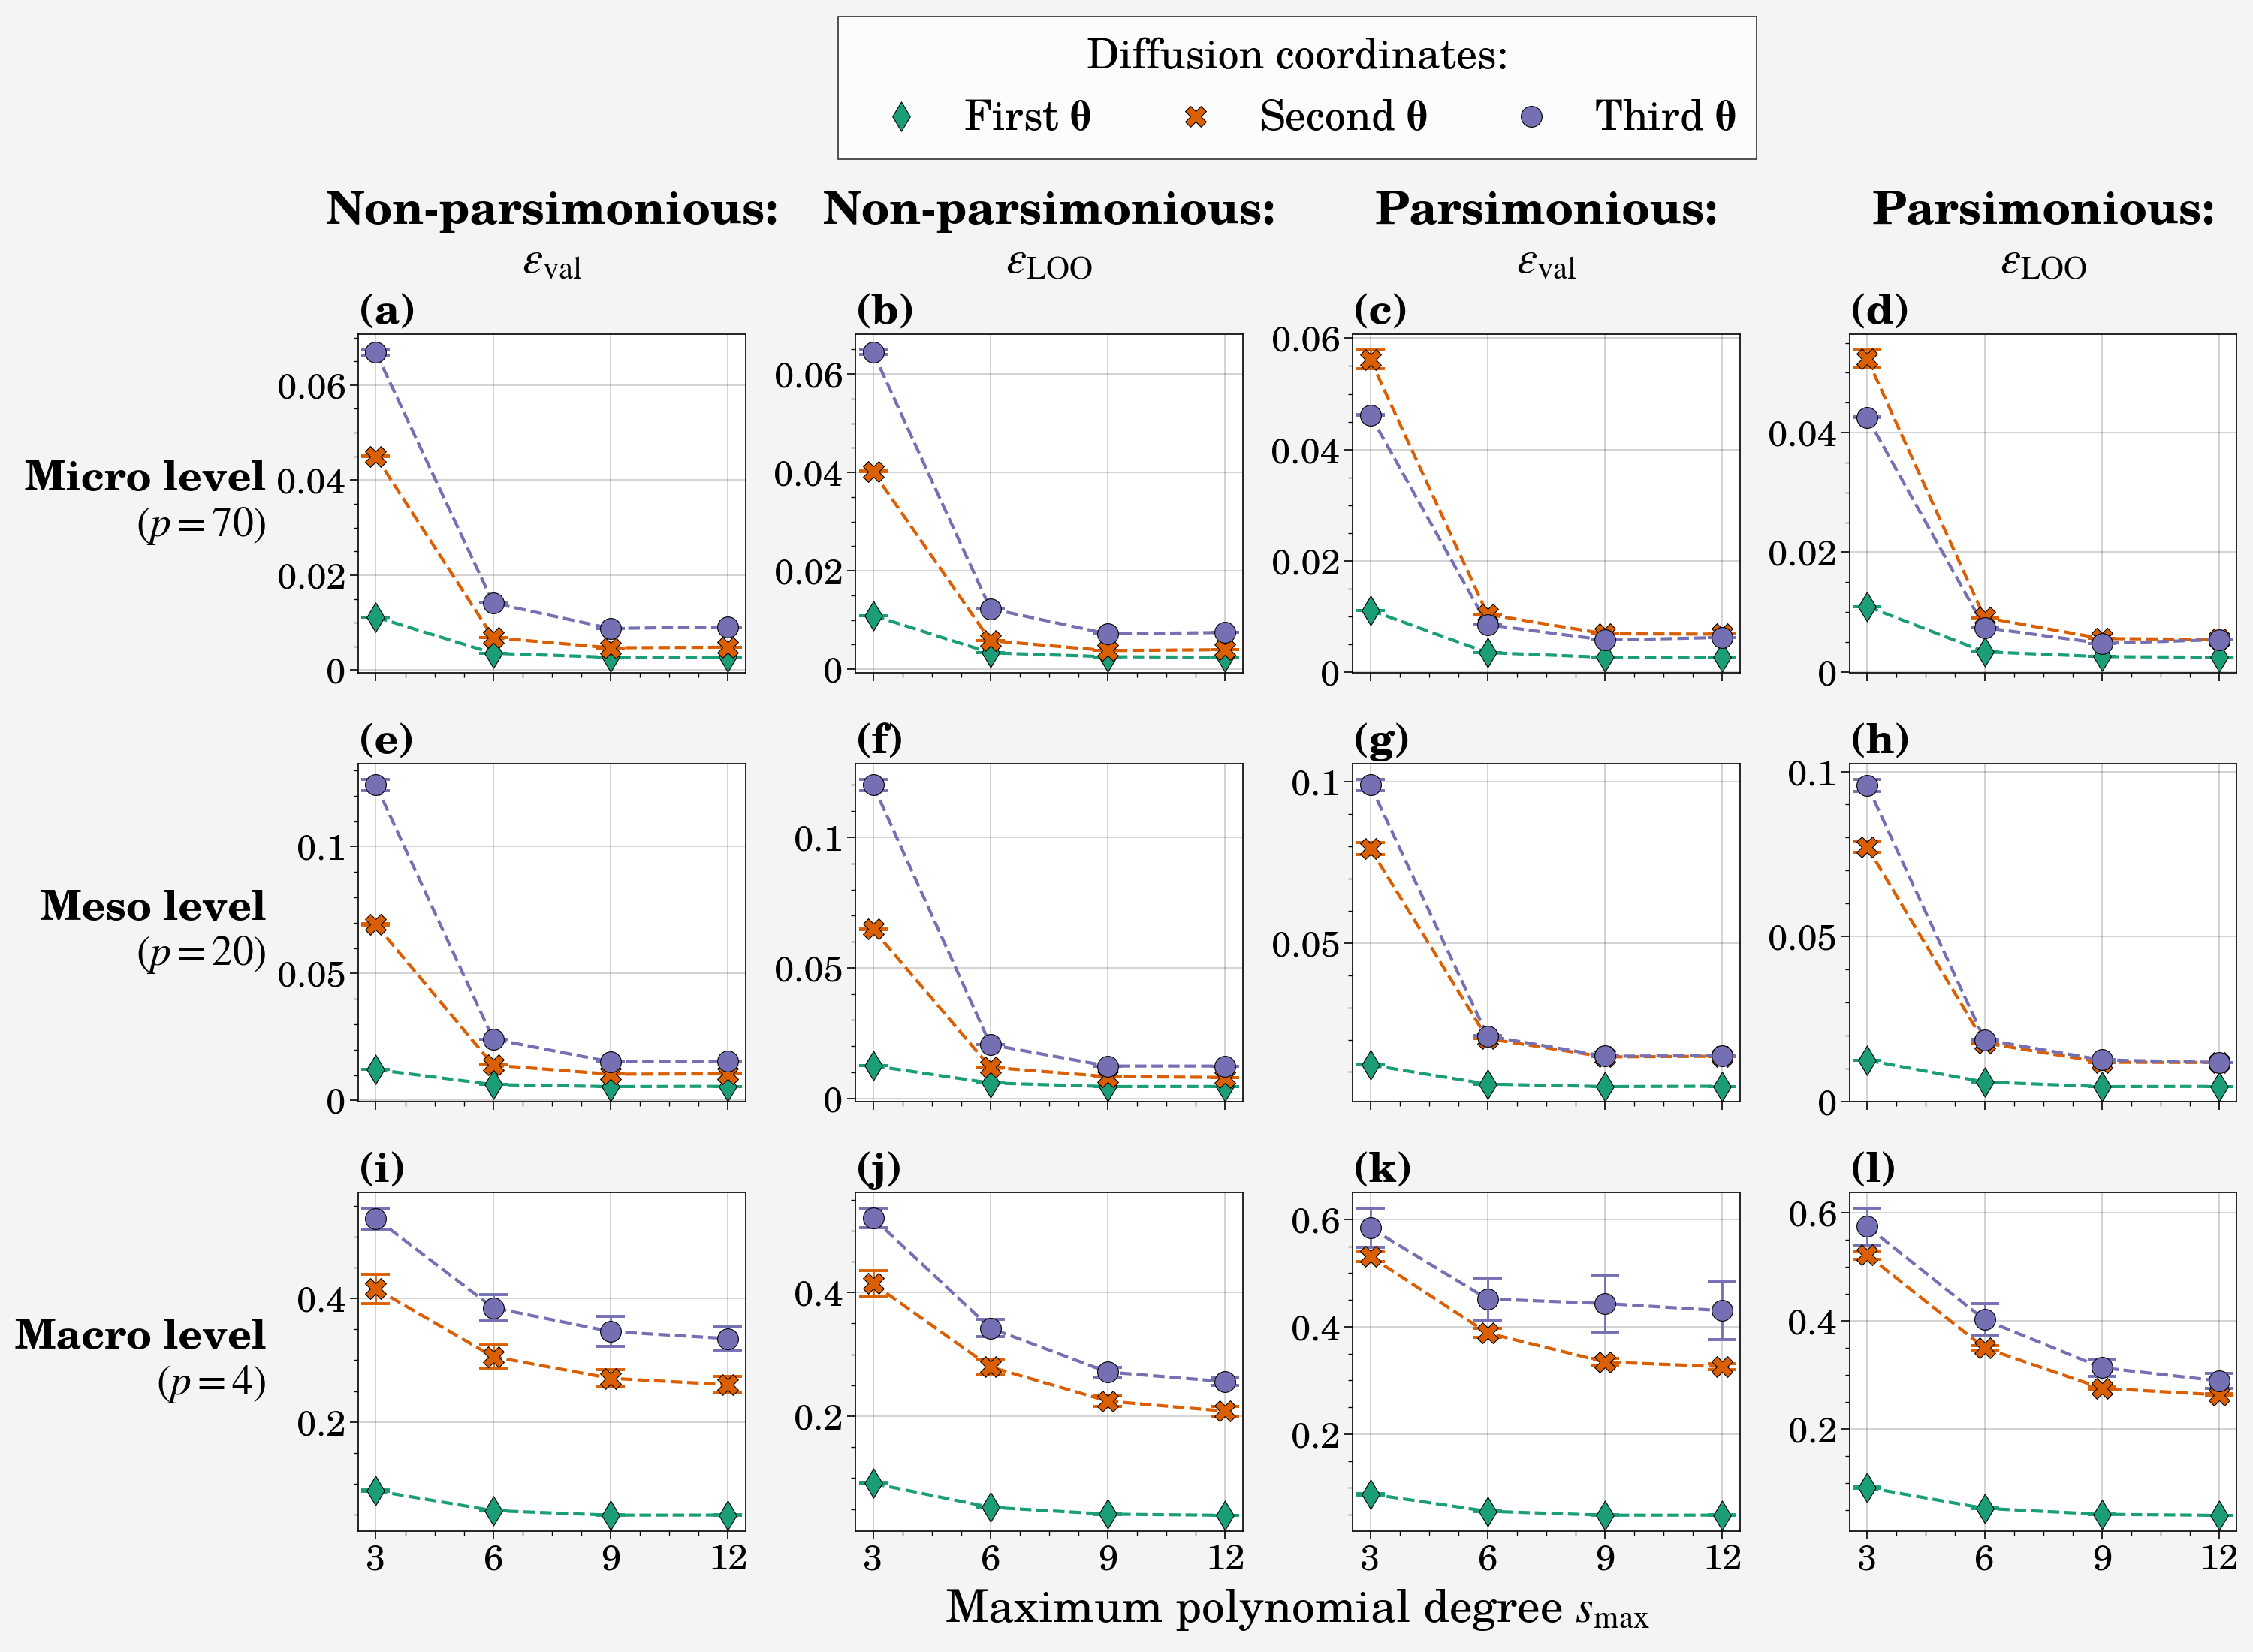

In [81]:
plot_GSA_errors(errors = LAR_errors_wo_MAE, 
                n_plot_cols = 4,
                n_plot_rows = 3,
                suptitle = None, 
                figsize = (15, 11),
                legend_n_cols = 3, 
                toplabels = ("Non-parsimonious:\n" + r"$\epsilon_{\mathrm{val}}$", 
                             "Non-parsimonious:\n" + r"$\epsilon_{\mathrm{LOO}}$",
                             "Parsimonious:\n" + r"$\epsilon_{\mathrm{val}}$",
                             "Parsimonious:\n" + r"$\epsilon_{\mathrm{LOO}}$",), 
                leftlabels=["Micro level\n"+r"$(p=70)$",
                            "Meso level\n"+r"$(p=20)$",
                            "Macro level\n"+r"$(p=4)$"], 
                legend_space=3.5,
                title = "PT6_LAR_errors_wo_MAE.pdf", 
                top=True)